# SeaIce-Prediction

### Introduction
Measurement of sea ice is important for safety of navigation and for monitoring the environment, particularly the climate. Sea ice extent interacts with large climate patterns such as the North Atlantic oscillation and Atlantic Multidecadal Oscillation, to name just two, and influences climate in the rest of the globe.  
The amount of sea ice coverage in the arctic has been of interest for centuries, as the Northwest Passage was of high interest for trade and seafaring. There is a longstanding history of records and measurements of some effects of the sea ice extent, but comprehensive measurements were sparse till the 1950s and started with the satellite era in the late 1970s. Modern direct records include data about ice extent, ice area, concentration, thickness, and the age of the ice.  

### Importance of seaice for the polar bears  
...  

Because of the polarbears we focus on the northern hemisphere

### Dataset  
The used data can be found on https://nsidc.org/ splitted in different datasets depending on the topic you wants to focus on e.g. a dataset for the whole northern hemisphere on a daily or monthly basis or another dataset showing the seaice-extent of each region in the northern hemisphere

#### Let's start

In [1]:
#import of the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from celluloid import Camera

warnings.filterwarnings('ignore')

# Use dark grid plot background from seaborn
sns.set(font_scale=1.5, style="darkgrid")

## Data on daily basis

#### Loading the daily data for seaice extent  
to load the data you can connect to the ftp client on the website. The code for that can be copied here: https://nsidc.org/support/64231694-FTP-Client-Data-Access or have a look on the 'getting_data' notebook

##### Exploring the data

In [2]:
df_n = pd.read_csv('../data/N_seaice_extent_daily_v3.0.csv')
df_n.head()

Year   Month   Day       Extent      Missing  \
0  YYYY      MM    DD   10^6 sq km   10^6 sq km   
1  1978      10    26       10.231        0.000   
2  1978      10    28       10.420        0.000   
3  1978      10    30       10.557        0.000   
4  1978      11    01       10.670        0.000   

                                         Source Data  
0   Source data product web sites: http://nsidc.o...  
1   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...  
2   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...  
3   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...  
4   ['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...

In [3]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14364 entries, 0 to 14363
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          14364 non-null  object
 1    Month        14364 non-null  object
 2    Day          14364 non-null  object
 3        Extent   14364 non-null  object
 4       Missing   14364 non-null  object
 5    Source Data  14364 non-null  object
dtypes: object(6)
memory usage: 673.4+ KB


In [4]:
df_n.shape

(14364, 6)

We can see that we have 6 columns with about 14000 rows. All of them are object type, so before going further we have to do some changes.  
First of all we drop the first row because it is the description but we have to keep in mind that the values for the extent and for the missing have to be multiplied with 10^6.  
We can also drop the Source Data column.

In [5]:
#drop first row because it's the description
df_n = df_n.iloc[1:,:]

#drop Source Data column
df_n.drop(' Source Data', axis=1, inplace=True)
df_n.head()

Year   Month   Day       Extent      Missing
1  1978      10    26       10.231        0.000
2  1978      10    28       10.420        0.000
3  1978      10    30       10.557        0.000
4  1978      11    01       10.670        0.000
5  1978      11    03       10.777        0.000

In [6]:
df_n.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing'], dtype='object')

Now we rename the columns in a more pythonic way

In [7]:
df_n.rename(columns={'Year':'year', ' Month':'month', ' Day':'day', '     Extent':'extent', '    Missing':'missing'}, inplace=True)
df_n.head()

year   month   day       extent      missing
1  1978      10    26       10.231        0.000
2  1978      10    28       10.420        0.000
3  1978      10    30       10.557        0.000
4  1978      11    01       10.670        0.000
5  1978      11    03       10.777        0.000

In [8]:
#change the date columns to pd.to_datetime
df_n['date'] = pd.to_datetime(df_n[['year', 'month', 'day']])
df_n.head()

year   month   day       extent      missing       date
1  1978      10    26       10.231        0.000 1978-10-26
2  1978      10    28       10.420        0.000 1978-10-28
3  1978      10    30       10.557        0.000 1978-10-30
4  1978      11    01       10.670        0.000 1978-11-01
5  1978      11    03       10.777        0.000 1978-11-03

now we have to change the entries for extent and missing into numbers

In [9]:
#change type
df_n[['extent','missing']] = df_n[['extent','missing']].astype(float)
df_n[['extent','missing']] *=1000000
df_n.head()

year   month   day      extent  missing       date
1  1978      10    26  10231000.0      0.0 1978-10-26
2  1978      10    28  10420000.0      0.0 1978-10-28
3  1978      10    30  10557000.0      0.0 1978-10-30
4  1978      11    01  10670000.0      0.0 1978-11-01
5  1978      11    03  10777000.0      0.0 1978-11-03

In [10]:
df_n.tail()

year   month   day     extent  missing       date
14359  2022      08    25  5385000.0      0.0 2022-08-25
14360  2022      08    26  5339000.0      0.0 2022-08-26
14361  2022      08    27  5293000.0      0.0 2022-08-27
14362  2022      08    28  5266000.0      0.0 2022-08-28
14363  2022      08    29  5252000.0      0.0 2022-08-29

#### plotting the data

In [11]:
#general plot settings
font = {'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('figure',figsize=(16, 9)) 
plt.rcParams['axes.labelweight'] = 'bold'


In [12]:
df_yearly_average = pd.DataFrame(df_n.groupby('year')['extent'].mean())
df_yearly_average['month'] = 12
df_yearly_average['day'] = 1
df_yearly_average = df_yearly_average.reset_index(level=0)
df_yearly_average['year'] = df_yearly_average['year'].astype(int)
df_yearly_average['date'] = pd.to_datetime(df_yearly_average[['year', 'month', 'day']])
df_yearly_average['extent'] /= 1000000
df_yearly_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    45 non-null     int64         
 1   extent  45 non-null     float64       
 2   month   45 non-null     int64         
 3   day     45 non-null     int64         
 4   date    45 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.9 KB


In [13]:
df_yearly_average = df_yearly_average[:-1]
df_yearly_average.tail()

year     extent  month  day       date
39  2017  10.392701     12    1 2017-12-01
40  2018  10.355041     12    1 2018-12-01
41  2019  10.200984     12    1 2019-12-01
42  2020  10.149869     12    1 2020-12-01
43  2021  10.551784     12    1 2021-12-01

In [14]:
df_yearly_average.head()

year     extent  month  day       date
0  1978  12.487000     12    1 1978-12-01
1  1979  12.319560     12    1 1979-12-01
2  1980  12.334148     12    1 1980-12-01
3  1981  12.135486     12    1 1981-12-01
4  1982  12.439445     12    1 1982-12-01

In [15]:
df_n_plot = df_n[['date', 'extent']]
df_n_plot['extent'] /= 1000000
df_n_plot.head()

date  extent
1 1978-10-26  10.231
2 1978-10-28  10.420
3 1978-10-30  10.557
4 1978-11-01  10.670
5 1978-11-03  10.777

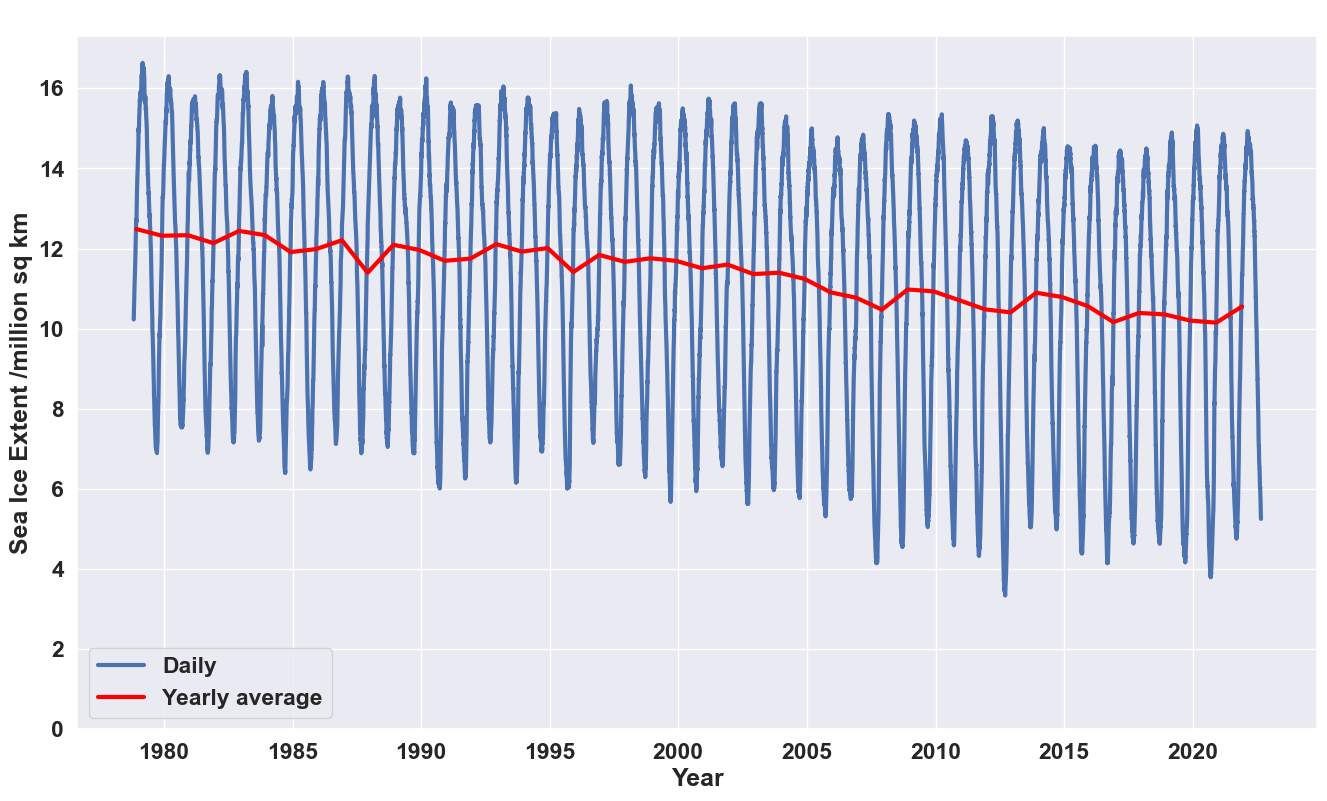

In [16]:
# Create figure and plot space
fig, ax = plt.subplots()

#plt.rcParams['axes.labelweight'] = 'bold'
ax.plot(df_n_plot['date'], df_n_plot['extent'], linewidth=3)
ax.plot(df_yearly_average['date'], df_yearly_average['extent'], color='red', linewidth=3)
ax.set(xlabel="Year",
       ylabel="Sea Ice Extent /million sq km",
       title=" ")
plt.legend(['Daily', 'Yearly average'], loc='lower left')
plt.ylim(0,)
plt.savefig('../images/whole_sea_ice_extent.png');

### Monthly Data  
there is also data available on a monthly basis. it shows the average for each month not only for the seaice-extent but also for the seaice-area.  
difference between extent and area!!!

In [17]:
# NSIDC monthly Sea ice extent, 25 km resolution, Northern hemisphere
# the data is in separate csv.-file for each month
# creating a complete unsorted csv.-file

import glob

path = r'../data/n_monthly' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.tail()

year   mo      data-type   region   extent     area
520  2018    6        Goddard        N    10.78     8.79
521  2019    6        Goddard        N    10.59     8.32
522  2020    6        Goddard        N    10.59     8.41
523  2021    6        Goddard        N    10.77     8.39
524  2022    6        NRTSI-G        N    10.86     8.60

In [18]:
frame.columns

Index(['year', ' mo', '    data-type', ' region', ' extent', '   area'], dtype='object')

In [19]:
#rename the columns because of spaces in front
frame.rename(columns={' mo':'month', '    data-type':'data_type', ' region':'region', ' extent':'extent', '   area':'area'}, inplace=True)

In [20]:
# add a column for the day
frame['day'] = 1
frame.head()

year  month      data_type   region  extent   area  day
0  1979      3        Goddard        N   16.34  13.21    1
1  1980      3        Goddard        N   16.04  12.99    1
2  1981      3        Goddard        N   15.63  12.71    1
3  1982      3        Goddard        N   16.04  13.07    1
4  1983      3        Goddard        N   16.09  12.93    1

In [21]:
#create a datetime
frame['date'] = pd.to_datetime(frame[['year', 'month', 'day']])
frame.head()

year  month      data_type   region  extent   area  day       date
0  1979      3        Goddard        N   16.34  13.21    1 1979-03-01
1  1980      3        Goddard        N   16.04  12.99    1 1980-03-01
2  1981      3        Goddard        N   15.63  12.71    1 1981-03-01
3  1982      3        Goddard        N   16.04  13.07    1 1982-03-01
4  1983      3        Goddard        N   16.09  12.93    1 1983-03-01

In [22]:
#sorting by date and reset the index
frame.sort_values(by='date', inplace=True)
frame = frame.reset_index(drop=True)
frame.head()

year  month      data_type   region  extent   area  day       date
0  1978     11        Goddard        N   11.65   9.04    1 1978-11-01
1  1978     12        Goddard        N   13.67  10.90    1 1978-12-01
2  1979      1        Goddard        N   15.41  12.41    1 1979-01-01
3  1979      2        Goddard        N   16.18  13.18    1 1979-02-01
4  1979      3        Goddard        N   16.34  13.21    1 1979-03-01

In [23]:
#resort and rename dataframe
df_month = frame[['date','data_type','region','extent','area','year','month']]
df_month.head()

date      data_type   region  extent   area  year  month
0 1978-11-01        Goddard        N   11.65   9.04  1978     11
1 1978-12-01        Goddard        N   13.67  10.90  1978     12
2 1979-01-01        Goddard        N   15.41  12.41  1979      1
3 1979-02-01        Goddard        N   16.18  13.18  1979      2
4 1979-03-01        Goddard        N   16.34  13.21  1979      3

In [24]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       525 non-null    datetime64[ns]
 1   data_type  525 non-null    object        
 2   region     525 non-null    object        
 3   extent     525 non-null    float64       
 4   area       525 non-null    float64       
 5   year       525 non-null    int64         
 6   month      525 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 28.8+ KB


In [25]:
df_month.describe()

extent         area         year       month
count   525.000000   525.000000   525.000000  525.000000
mean    -26.736476   -47.895048  2000.209524    6.485714
std     617.273881   755.117714    12.645863    3.459455
min   -9999.000000 -9999.000000  1978.000000    1.000000
25%       8.550000     6.240000  1989.000000    3.000000
50%      12.080000     9.950000  2000.000000    6.000000
75%      14.300000    12.290000  2011.000000    9.000000
max      16.340000    13.900000  2022.000000   12.000000

In [26]:
#although there are no missing values there are min values of -9999 in the extent and area column
#replacing the -9999 values in extent and area with the value of the year before

for index, val in enumerate(df_month['extent']):
    if val == -9999:
        df_month['extent'].loc[index] = df_month['extent'].loc[index - 12]

for index, val in enumerate(df_month['area']):
    if val == -9999:
        df_month['area'].loc[index] = df_month['area'].loc[index - 12]  

In [27]:
#multiplying with 10^6
df_month[['extent','area']] *=1000000
df_month.head()

date      data_type   region      extent        area  year  month
0 1978-11-01        Goddard        N  11650000.0   9040000.0  1978     11
1 1978-12-01        Goddard        N  13670000.0  10900000.0  1978     12
2 1979-01-01        Goddard        N  15410000.0  12410000.0  1979      1
3 1979-02-01        Goddard        N  16180000.0  13180000.0  1979      2
4 1979-03-01        Goddard        N  16340000.0  13210000.0  1979      3

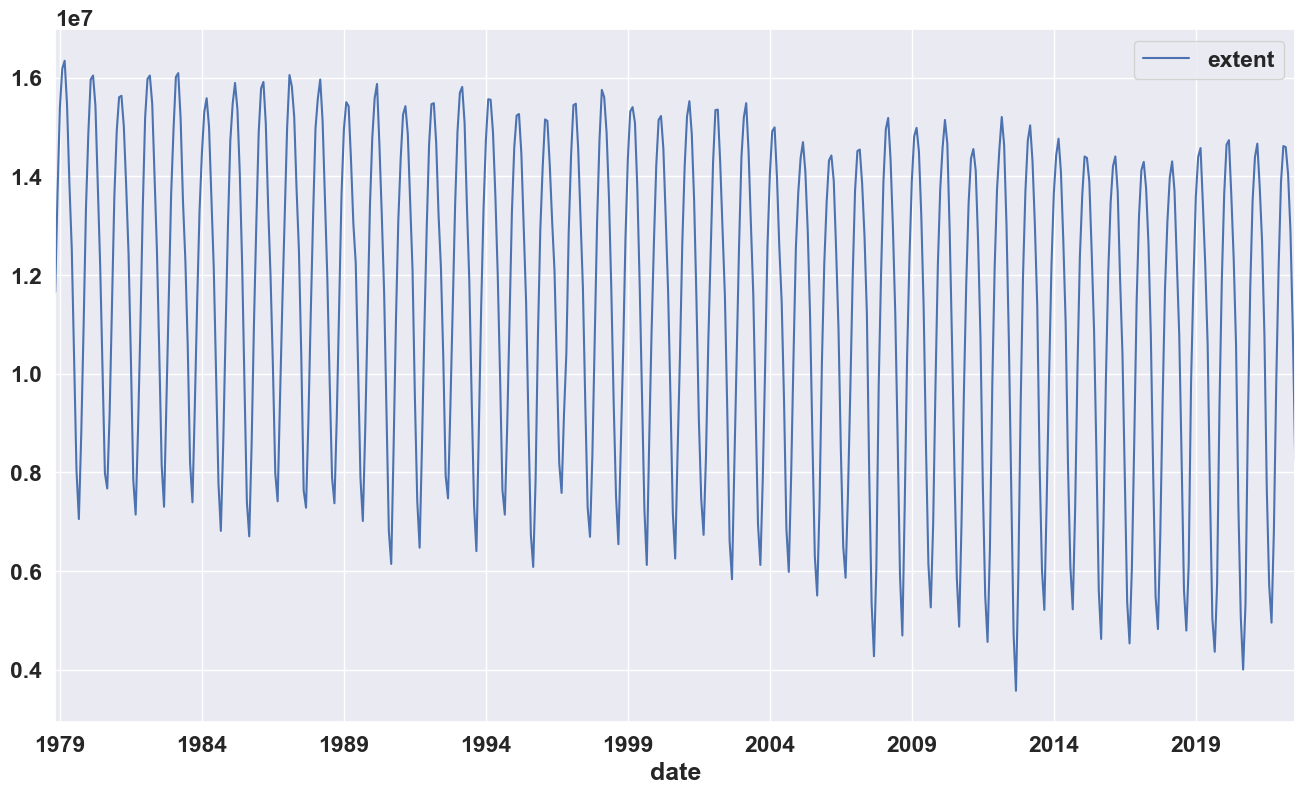

In [28]:
df_month.plot(x='date', y='extent');

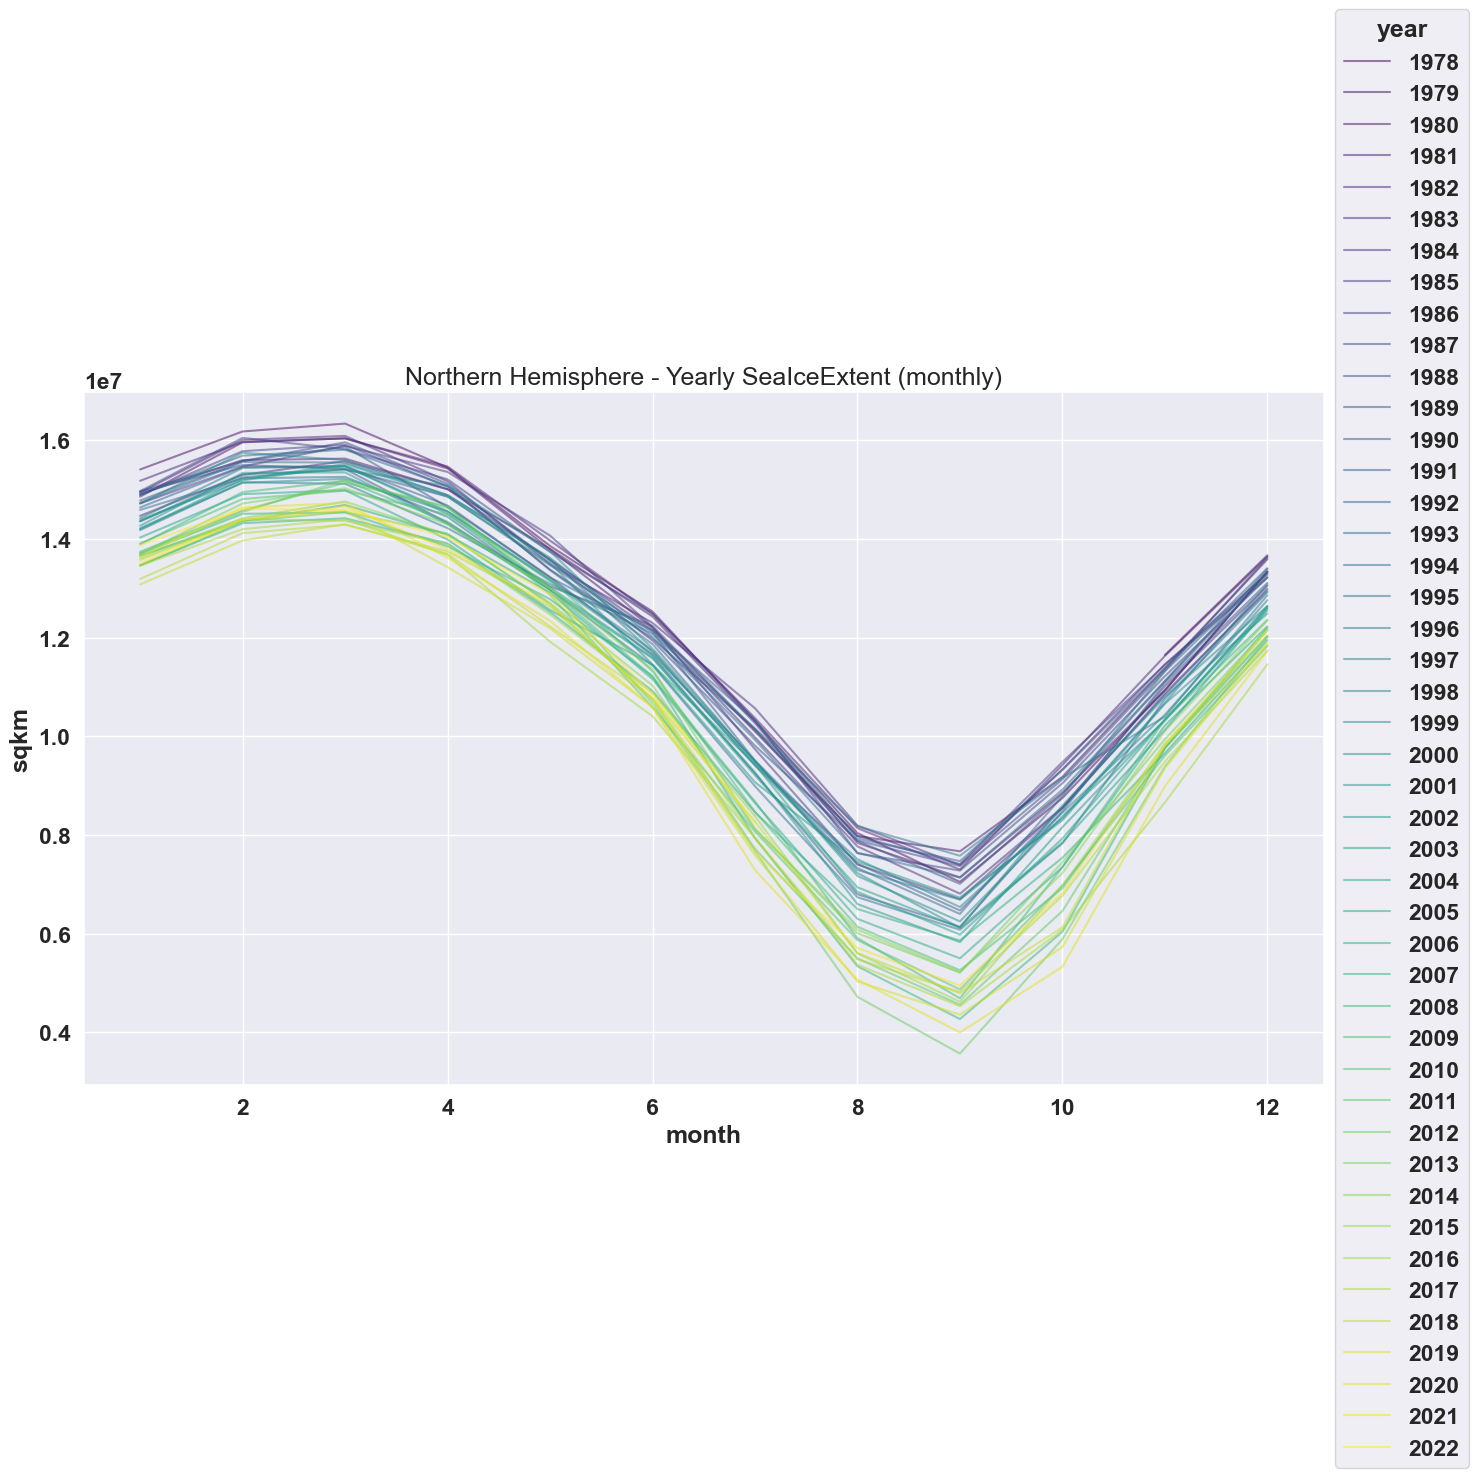

In [29]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df_month[['year', 'month', 'extent']], index='month', columns='year') \
    ['extent'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Northern Hemisphere - Yearly SeaIceExtent (monthly)', ylabel=r'sqkm');

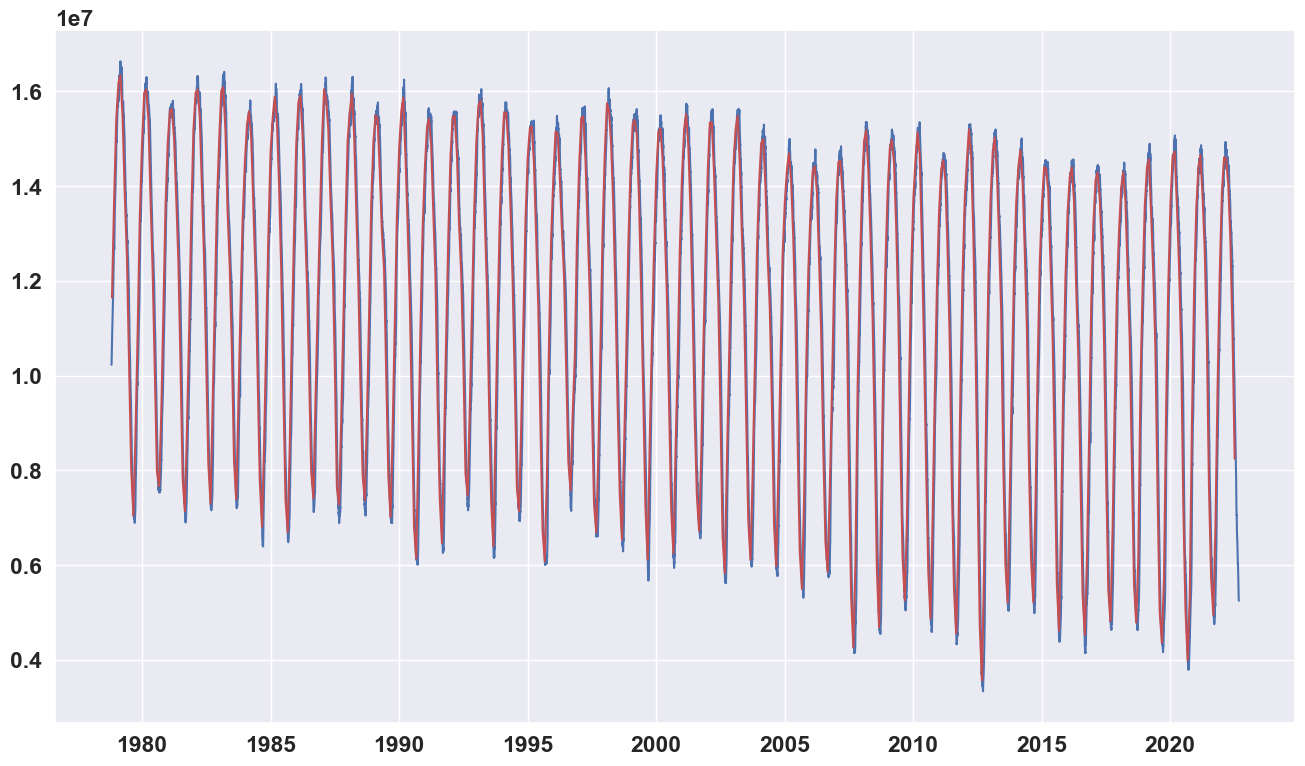

In [30]:
#comparing daily data with monthly data
plt.plot(df_n['date'], df_n['extent'], 'b', df_month['date'], df_month['extent'], 'r');
#legend!

#### Animation: yearly life cycle

In [31]:
df_month_permio = df_month
df_month_permio[['extent','area']] /= 1000000

In [32]:
df_month_ani = pd.pivot_table(data=df_month_permio[['year', 'month', 'extent']], index='month', columns='year') \
    ['extent']
df_month_ani.drop([1978,2022], inplace = True , axis = 1)
df_month_ani

year    1979   1980   1981   1982   1983   1984   1985   1986   1987   1988  \
month                                                                         
1      15.41  14.86  14.91  15.18  14.94  14.47  14.72  14.89  14.97  14.97   
2      16.18  15.96  15.60  15.97  16.01  15.30  15.47  15.78  16.05  15.58   
3      16.34  16.04  15.63  16.04  16.09  15.58  15.89  15.91  15.82  15.96   
4      15.45  15.43  15.01  15.47  15.17  15.01  15.36  15.06  15.21  15.12   
5      13.86  13.79  13.80  13.97  13.49  13.58  14.07  13.38  13.74  13.56   
6      12.53  12.20  12.43  12.48  12.30  12.15  12.22  11.98  12.49  11.94   
7      10.31  10.10  10.27  10.37  10.57   9.98   9.74  10.15  10.33   9.81   
8       8.04   7.98   7.84   8.14   8.19   7.77   7.40   7.98   7.63   7.89   
9       7.05   7.67   7.14   7.30   7.39   6.81   6.70   7.41   7.28   7.37   
10      8.75   9.18   8.86   9.42   9.33   8.56   8.55   9.48   9.05   9.13   
11     10.94  11.38  10.93  11.63  11.46  10.84  11.02  11.45  11.22  11.33   
12     13.34  13.59  13.34  13.64  13.30  12.99  13.05  13.22  13.22  13.63   

year   ...   2012   2013   2014   2015   2016   2017   2018   2019   2020  \
month  ...                                                                  
1      ...  13.73  13.70  13.65  13.60  13.46  13.19  13.08  13.57  13.64   
2      ...  14.55  14.72  14.42  14.40  14.20  14.12  13.97  14.39  14.64   
3      ...  15.20  15.03  14.76  14.37  14.40  14.29  14.30  14.57  14.73   
4      ...  14.63  14.30  14.09  13.89  13.68  13.75  13.70  13.43  13.62   
5      ...  13.01  13.00  12.70  12.47  11.92  12.63  12.23  12.19  12.34   
6      ...  10.67  11.36  11.03  10.88  10.41  10.76  10.78  10.59  10.59   
7      ...   7.67   8.13   8.11   8.38   7.94   7.94   8.27   7.59   7.29   
8      ...   4.72   6.01   6.08   5.60   5.37   5.48   5.61   5.03   5.07   
9      ...   3.57   5.21   5.22   4.62   4.53   4.82   4.79   4.36   4.00   
10     ...   5.89   7.45   7.23   6.97   6.08   6.77   6.13   5.73   5.33   
11     ...   9.39   9.94  10.11   9.85   8.66   9.49   9.82   9.35   8.99   
12     ...  12.01  12.18  12.35  12.04  11.46  11.74  11.86  11.90  11.73   

year    2021  
month         
1      13.50  
2      14.39  
3      14.66  
4      13.79  
5      12.68  
6      10.77  
7       7.65  
8       5.71  
9       4.95  
10      6.82  
11      9.83  
12     12.15  

[12 rows x 43 columns]

In [33]:
df_month_ani.shape

(12, 43)

MovieWriter ffmpeg unavailable; using Pillow instead.


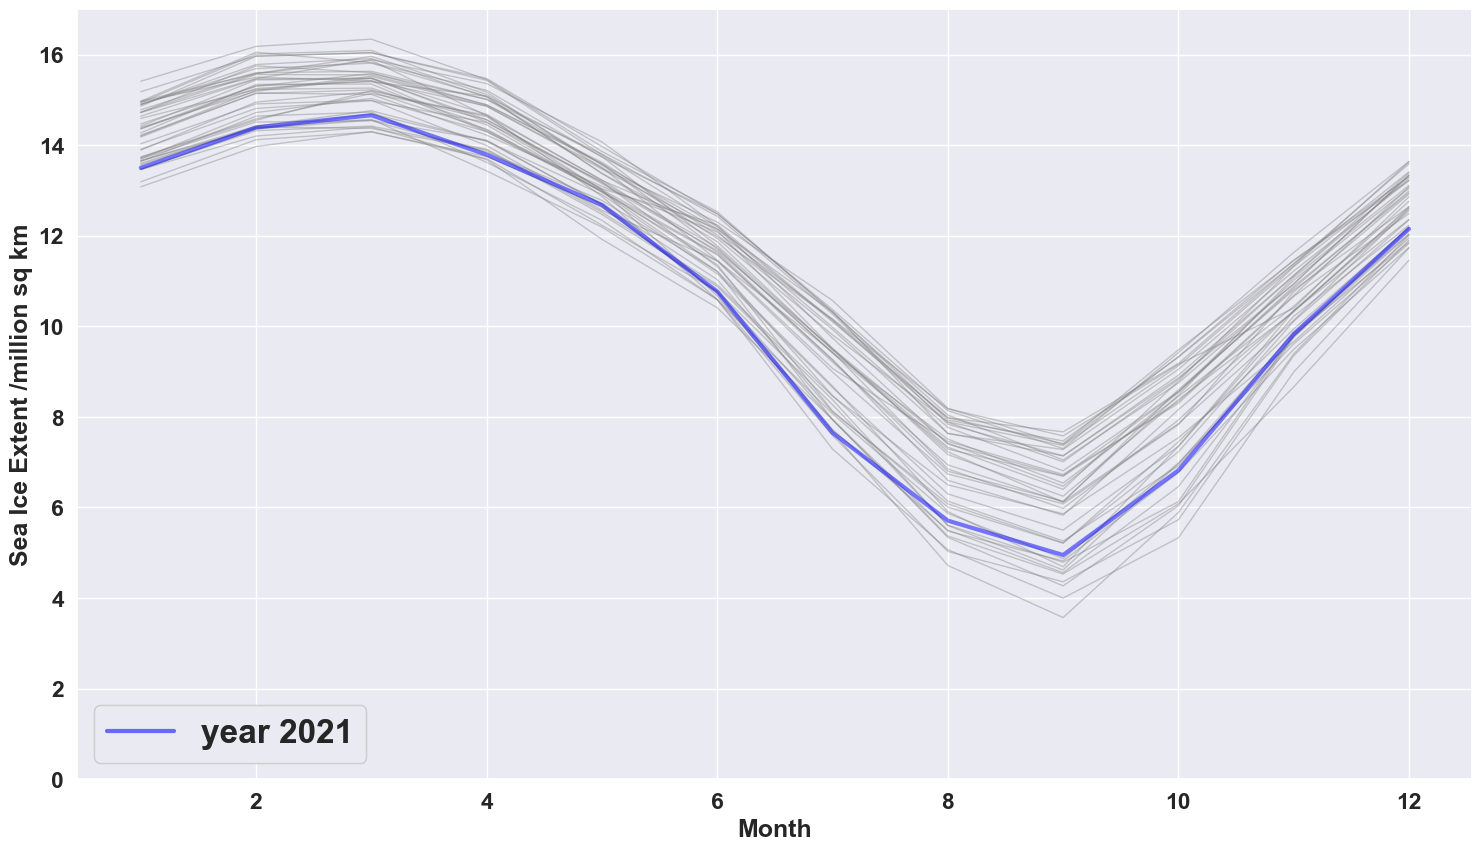

In [34]:
#creating animation for presentation
fig, ax = plt.subplots(figsize=(18,10))
camera = Camera(fig)


for i in range(43):
    for k in range(i):
        ax.plot(df_month_ani.iloc[:, k], marker='', color='grey', linewidth=1, alpha=0.4)

    t = ax.plot(df_month_ani.iloc[:, i], linewidth=3, alpha=0.5, color='blue')
    plt.ylim(0,17)
    ax.legend(t, [f'year {i+1979}'], loc='lower left', prop={'size': 24})
    # Set title and labels for axes
    ax.set(xlabel="Month",
            ylabel="Sea Ice Extent /million sq km",
            title="")
    #fig.suptitle('Annual trend of Sea Ice Extent', fontsize = 24)

    # Define the date format
    #date_form = DateFormatter("%m-%d")
    #ax.xaxis.set_major_formatter(date_form)
    #ax.xaxis.set_major_formatter(DateFormatter('%b'))

    camera.snap()

#Applying the animate method to create animations
animation = camera.animate(interval=500)
 
#Saving the animation
animation.save('../images/my_animation4.gif')
# to store it as mp4
#animation.save('../images/my_animation2.mp4')

#### Masie-Data

The Multisensor Analyzed Sea Ice Extent - Northern Hemisphere (MASIE-NH) products provide measurements of daily sea ice extent and sea ice edge boundary for the Northern Hemisphere and 16 Arctic regions in a polar stereographic projection at both 1 km and 4 km grid cell sizes.

In [35]:
df_masie4 = pd.read_csv('../data/masie_4km_allyears_extent_sqkm.csv')
df_masie4.head()

yyyyddd   (0) Northern_Hemisphere   (1) Beaufort_Sea   (2) Chukchi_Sea  \
0  2006001               13034723.95         1069710.81         966006.16   
1  2006002               13034723.95         1069710.81         966006.16   
2  2006003               13170663.24         1069710.81         966006.16   
3  2006004               13409715.53         1069710.81         966006.16   
4  2006005               13416779.12         1069710.81         966006.16   

    (3) East_Siberian_Sea   (4) Laptev_Sea   (5) Kara_Sea   (6) Barents_Sea  \
0              1087102.72        897773.37      901663.34         432629.77   
1              1087102.72        897773.37      901663.34         432629.77   
2              1087102.72        897773.37      901663.34         432629.77   
3              1087102.72        897773.37      906439.04         458823.88   
4              1087102.72        897773.37      908697.29         474574.82   

    (7) Greenland_Sea   (8) Baffin_Bay_Gulf_of_St._Lawrence  \
0           550158.41                             831365.98   
1           550158.41                             831365.98   
2           595342.42                             855907.47   
3           605747.86                             980253.85   
4           600826.71                             970631.09   

    (9) Canadian_Archipelago   (10) Hudson_Bay   (11) Central_Arctic  \
0                  852715.31        1260715.19            3225371.74   
1                  852715.31        1260715.19            3225371.74   
2                  852715.31        1260779.00            3240507.71   
3                  852715.31        1260779.00            3240326.47   
4                  852715.31        1260779.00            3240326.47   

    (12) Bering_Sea   (13) Baltic_Sea   (14) Sea_of_Okhotsk   (15) Yellow_Sea  \
0         639590.07          11408.53             287369.54          12152.54   
1         639590.07          11408.53             287369.54          12152.54   
2         666030.40          11408.53             311943.21          12152.54   
3         683780.08          11408.53             372868.02           6989.96   
4         683795.38          21311.46             363515.34           8240.73   

    (16) Cook_Inlet  
0           6420.96  
1           6420.96  
2           6420.96  
3           6420.96  
4           8202.95

In [36]:
df_masie4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   yyyyddd                               6043 non-null   int64  
 1    (0) Northern_Hemisphere              6043 non-null   float64
 2    (1) Beaufort_Sea                     6043 non-null   float64
 3    (2) Chukchi_Sea                      6043 non-null   float64
 4    (3) East_Siberian_Sea                6043 non-null   float64
 5    (4) Laptev_Sea                       6043 non-null   float64
 6    (5) Kara_Sea                         6043 non-null   float64
 7    (6) Barents_Sea                      6043 non-null   float64
 8    (7) Greenland_Sea                    6043 non-null   float64
 9    (8) Baffin_Bay_Gulf_of_St._Lawrence  6043 non-null   float64
 10   (9) Canadian_Archipelago             6043 non-null   float64
 11   (10) Hudson_Bay 

In [37]:
df_masie4.columns

Index(['yyyyddd', ' (0) Northern_Hemisphere', ' (1) Beaufort_Sea',
       ' (2) Chukchi_Sea', ' (3) East_Siberian_Sea', ' (4) Laptev_Sea',
       ' (5) Kara_Sea', ' (6) Barents_Sea', ' (7) Greenland_Sea',
       ' (8) Baffin_Bay_Gulf_of_St._Lawrence', ' (9) Canadian_Archipelago',
       ' (10) Hudson_Bay', ' (11) Central_Arctic', ' (12) Bering_Sea',
       ' (13) Baltic_Sea', ' (14) Sea_of_Okhotsk', ' (15) Yellow_Sea',
       ' (16) Cook_Inlet'],
      dtype='object')

In [38]:
#renaming the columns to get rid of the empty spaces in front of the name
df_masie4.rename(columns={' (0) Northern_Hemisphere':'Northern_Hemisphere', ' (1) Beaufort_Sea':'Beaufort_Sea(1)',
       ' (2) Chukchi_Sea':'Chukchi_Sea(2)', ' (3) East_Siberian_Sea':'East_Siberian_Sea(3)', ' (4) Laptev_Sea':'Laptev_Sea(4)',
       ' (5) Kara_Sea':'Kara_Sea(5)', ' (6) Barents_Sea':'Barents_Sea(6)', ' (7) Greenland_Sea':'Greenland_Sea(7)',
       ' (8) Baffin_Bay_Gulf_of_St._Lawrence':'Baffin_Bay_Gulf_of_St._Lawrence(8)', ' (9) Canadian_Archipelago':'Canadian_Archipelago(9)',
       ' (10) Hudson_Bay':'Hudson_Bay(10)', ' (11) Central_Arctic':'Central_Arctic(11)', ' (12) Bering_Sea':'Bering_Sea(12)',
       ' (13) Baltic_Sea':'Baltic_Sea(13)', ' (14) Sea_of_Okhotsk':'Sea_of_Okhotsk(14)', ' (15) Yellow_Sea':'Yellow_Sea(15)',
       ' (16) Cook_Inlet':'Cook_Inlet(16)'}, inplace=True)

df_masie4.head(1)


yyyyddd  Northern_Hemisphere  Beaufort_Sea(1)  Chukchi_Sea(2)  \
0  2006001          13034723.95       1069710.81       966006.16   

   East_Siberian_Sea(3)  Laptev_Sea(4)  Kara_Sea(5)  Barents_Sea(6)  \
0            1087102.72      897773.37    901663.34       432629.77   

   Greenland_Sea(7)  Baffin_Bay_Gulf_of_St._Lawrence(8)  \
0         550158.41                           831365.98   

   Canadian_Archipelago(9)  Hudson_Bay(10)  Central_Arctic(11)  \
0                852715.31      1260715.19          3225371.74   

   Bering_Sea(12)  Baltic_Sea(13)  Sea_of_Okhotsk(14)  Yellow_Sea(15)  \
0       639590.07        11408.53           287369.54        12152.54   

   Cook_Inlet(16)  
0         6420.96

In [39]:
#splitting the column for the date in year and day_of_year
li_year = []
li_day = []
for i in range(0, len(df_masie4['yyyyddd'])):
    day_year = str(df_masie4['yyyyddd'][i])
    li_day.append(int(day_year[-3:])) 
    li_year.append(int(day_year[:4]))
    
df_masie4 = df_masie4.assign(year = li_year, doy = li_day) 

#creating a datetime column
li_date = []
for i in range(0, len(df_masie4['doy'])):
    li_date.append(pd.to_datetime(df_masie4['doy'][i]-1, unit='D', origin=str(df_masie4['year'][i])))

df_masie4 = df_masie4.assign(date = li_date)
df_masie4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   yyyyddd                             6043 non-null   int64         
 1   Northern_Hemisphere                 6043 non-null   float64       
 2   Beaufort_Sea(1)                     6043 non-null   float64       
 3   Chukchi_Sea(2)                      6043 non-null   float64       
 4   East_Siberian_Sea(3)                6043 non-null   float64       
 5   Laptev_Sea(4)                       6043 non-null   float64       
 6   Kara_Sea(5)                         6043 non-null   float64       
 7   Barents_Sea(6)                      6043 non-null   float64       
 8   Greenland_Sea(7)                    6043 non-null   float64       
 9   Baffin_Bay_Gulf_of_St._Lawrence(8)  6043 non-null   float64       
 10  Canadian_Archipelago(9) 

#### comparing higher resolution (df_masie4) with lower resolution (df_n (25km grid))

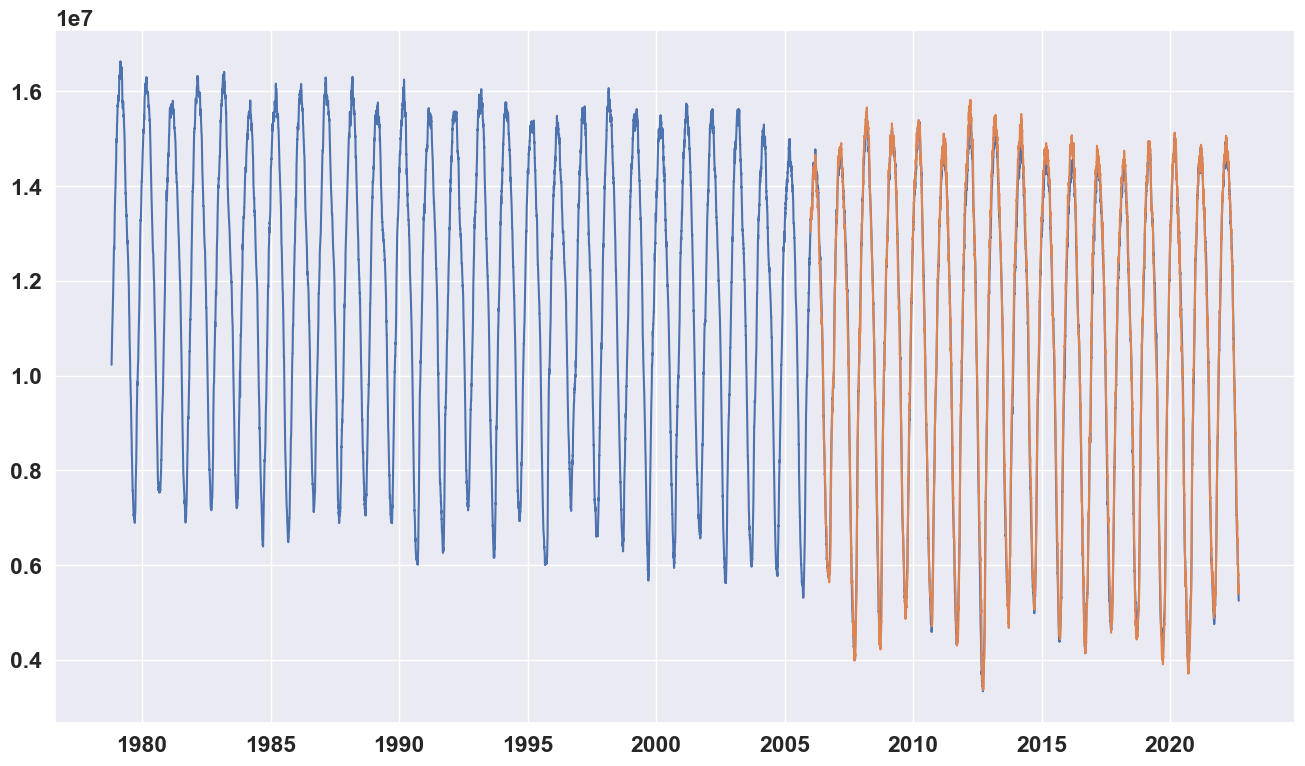

In [40]:
plt.plot(df_n['date'], df_n['extent'])
plt.plot(df_masie4['date'], df_masie4['Northern_Hemisphere'])

#### comparing the regions

Our dataset consist of the data of different regions in the northern hemisphere. see List below

![image](../images/landmask_with_regions_countries.png)

In [41]:
region_list = df_masie4.columns[2:-4].to_list()
print(region_list)

['Beaufort_Sea(1)', 'Chukchi_Sea(2)', 'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)', 'Barents_Sea(6)', 'Greenland_Sea(7)', 'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)', 'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)', 'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)']


In [42]:
dict_colours = {'1':'#48D1CC', '2':'#32CD32', '3':'#E6E6FA', 
                '4':'#FF6347', '5':'#4682B4', '6':'#8A2BE2', 
                '7':'#ADFF2F', '8':'#0000CD', '9': '#FFB6C1', 
                '10':'#FFA500', '11':'#FFFFE0', '12':'#FFFACD', 
                '13':'#32CD32', '14':'#800080', '15':'#FFFF00',
                 '16':'#9370DB'}

to see if there is different behaviour for the individual regions (decreasing or increasing the ice extent) we compare them 

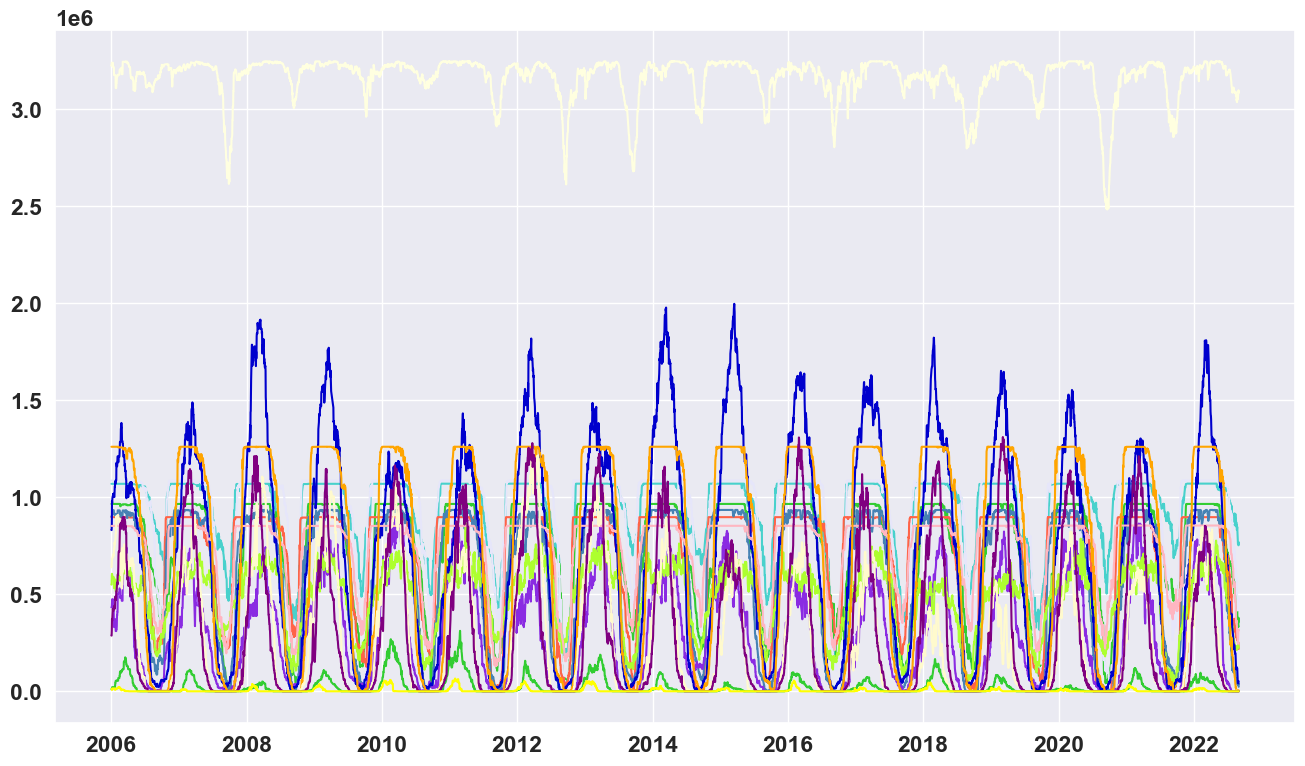

In [43]:
for index, region in enumerate(region_list):
    plt.plot(df_masie4['date'], df_masie4[region], color=dict_colours[str(index+1)])

In [44]:
#plot for presentation
df_masie4_plot = df_masie4[['date', 'Central_Arctic(11)', 'Hudson_Bay(10)', 'Sea_of_Okhotsk(14)']]
df_masie4_plot[['Central_Arctic(11)', 'Hudson_Bay(10)', 'Sea_of_Okhotsk(14)']] /= 1000000

In [45]:
dict_colours1 = {'1':'#DDC7A0', '2':'#FF9900', '3':'#800080'}

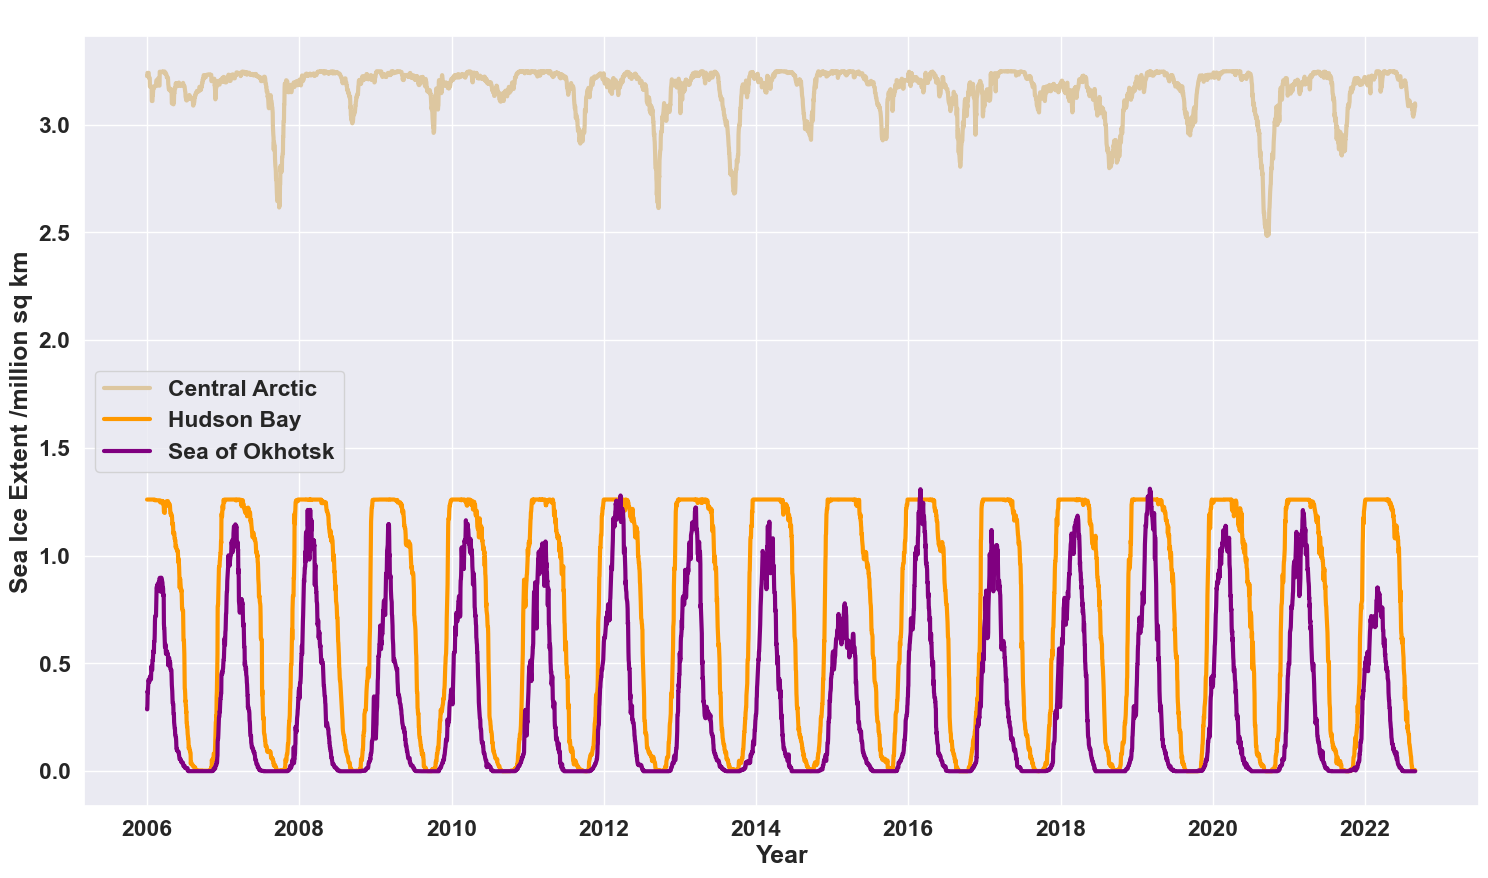

In [46]:
fig, ax = plt.subplots(figsize=(18,10))

for index, region in enumerate(['Central_Arctic(11)', 'Hudson_Bay(10)', 'Sea_of_Okhotsk(14)']):
    plt.plot(df_masie4_plot['date'], df_masie4_plot[region], color=dict_colours1[str(index+1)], linewidth=3)

plt.legend(['Central Arctic', 'Hudson Bay', 'Sea of Okhotsk'], loc='center left')
ax.set(xlabel="Year",
       ylabel="Sea Ice Extent /million sq km",
       title=" ")

plt.savefig('../images/regions_extent.png')

In [47]:
df_masie4.columns

Index(['yyyyddd', 'Northern_Hemisphere', 'Beaufort_Sea(1)', 'Chukchi_Sea(2)',
       'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)',
       'Barents_Sea(6)', 'Greenland_Sea(7)',
       'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)',
       'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)',
       'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)',
       'Cook_Inlet(16)', 'year', 'doy', 'date'],
      dtype='object')

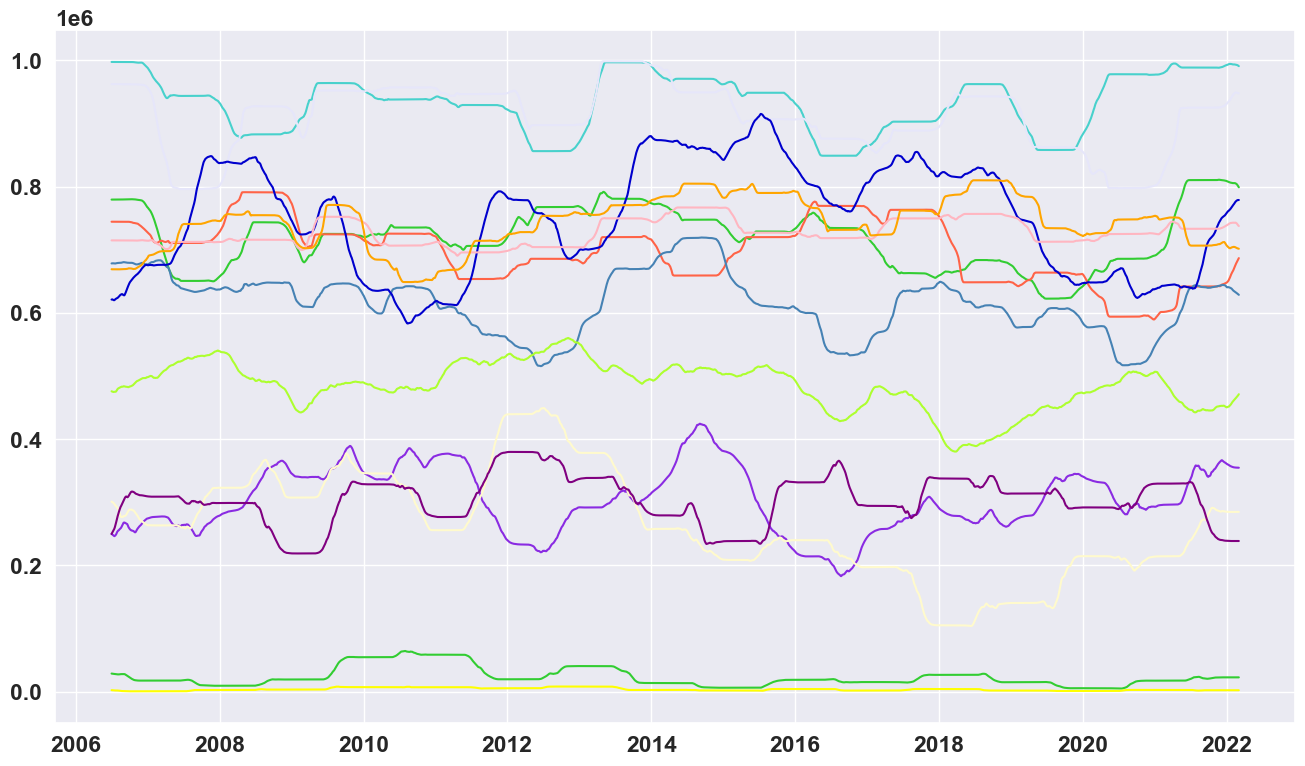

In [48]:
smooth_df_masie4 = df_masie4[['yyyyddd', 'Northern_Hemisphere', 'Beaufort_Sea(1)', 'Chukchi_Sea(2)',
       'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)',
       'Barents_Sea(6)', 'Greenland_Sea(7)',
       'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)',
       'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)',
       'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)',
       'Cook_Inlet(16)', 'year', 'doy', 'date']]

for index, region in enumerate(region_list):
    if index != 10:
        smooth_df_masie4[f'extent_smooth_{region}'] = smooth_df_masie4[region].rolling(window=365,center=True).mean()
        plt.plot(smooth_df_masie4['date'], smooth_df_masie4[f'extent_smooth_{region}'], color=dict_colours[str(index+1)])

In [49]:
df_masie4.describe()

yyyyddd  Northern_Hemisphere  Beaufort_Sea(1)  Chukchi_Sea(2)  \
count  6.043000e+03         6.043000e+03     6.043000e+03     6043.000000   
mean   2.014045e+06         1.069811e+07     9.381280e+05   725919.851440   
std    4.812407e+03         3.517869e+06     1.990512e+05   282346.478248   
min    2.006001e+06         3.368882e+06     1.734670e+05       51.080000   
25%    2.010080e+06         7.591260e+06     8.366396e+05   523842.505000   
50%    2.014135e+06         1.142784e+07     1.063595e+06   864009.400000   
75%    2.018192e+06         1.391298e+07     1.070445e+06   966006.160000   
max    2.022242e+06         1.582189e+07     1.070776e+06   966006.160000   

       East_Siberian_Sea(3)  Laptev_Sea(4)    Kara_Sea(5)  Barents_Sea(6)  \
count          6.043000e+03    6043.000000    6043.000000     6043.000000   
mean           9.142553e+05  701707.600300  619746.486723   305253.763144   
std            2.922433e+05  294122.785736  353868.716891   260833.320705   
min            3.505000e+01       0.000000       0.000000        0.000000   
25%            8.736795e+05  551201.565000  239403.170000    41283.730000   
50%            1.082525e+06  895800.250000  821959.930000   267782.610000   
75%            1.087137e+06  897844.800000  921523.020000   534903.975000   
max            1.087137e+06  897844.800000  935023.260000   936263.420000   

       Greenland_Sea(7)  Baffin_Bay_Gulf_of_St._Lawrence(8)  \
count       6043.000000                        6.043000e+03   
mean      486377.680468                        7.549749e+05   
std       169297.423093                        5.461642e+05   
min        28610.820000                        1.857660e+03   
25%       360290.975000                        1.911272e+05   
50%       538105.680000                        7.765030e+05   
75%       617259.850000                        1.202452e+06   
max       866528.470000                        1.997628e+06   

       Canadian_Archipelago(9)  Hudson_Bay(10)  Central_Arctic(11)  \
count              6043.000000    6.043000e+03        6.043000e+03   
mean             729099.549255    7.486330e+05        3.164686e+06   
std              193044.270276    5.324182e+05        1.117104e+05   
min              129273.330000    0.000000e+00        2.483819e+06   
25%              672153.440000    1.018969e+05        3.149792e+06   
50%              847605.710000    1.021257e+06        3.203341e+06   
75%              853214.250000    1.260309e+06        3.232754e+06   
max              854772.730000    1.260903e+06        3.248013e+06   

       Bering_Sea(12)  Baltic_Sea(13)  Sea_of_Okhotsk(14)  Yellow_Sea(15)  \
count    6.043000e+03     6043.000000        6.043000e+03     6043.000000   
mean     2.692428e+05    23681.236955        3.039701e+05     3760.659780   
std      3.157208e+05    43487.502983        3.837027e+05     9852.199031   
min      0.000000e+00        0.000000        0.000000e+00        0.000000   
25%      3.341000e+01        0.000000        3.170000e+01        0.000000   
50%      9.838649e+04       48.090000        7.092440e+04        0.000000   
75%      5.414589e+05    29010.070000        5.853096e+05       24.120000   
max      1.249263e+06   311699.530000        1.310869e+06    66146.420000   

       Cook_Inlet(16)         year          doy  
count     6043.000000  6043.000000  6043.000000  
mean      3103.900645  2013.863975   180.698660  
std       4705.559801     4.815534   104.925852  
min          0.000000  2006.000000     1.000000  
25%          0.000000  2010.000000    90.000000  
50%        109.630000  2014.000000   180.000000  
75%       5486.950000  2018.000000   271.000000  
max      22141.700000  2022.000000   366.000000

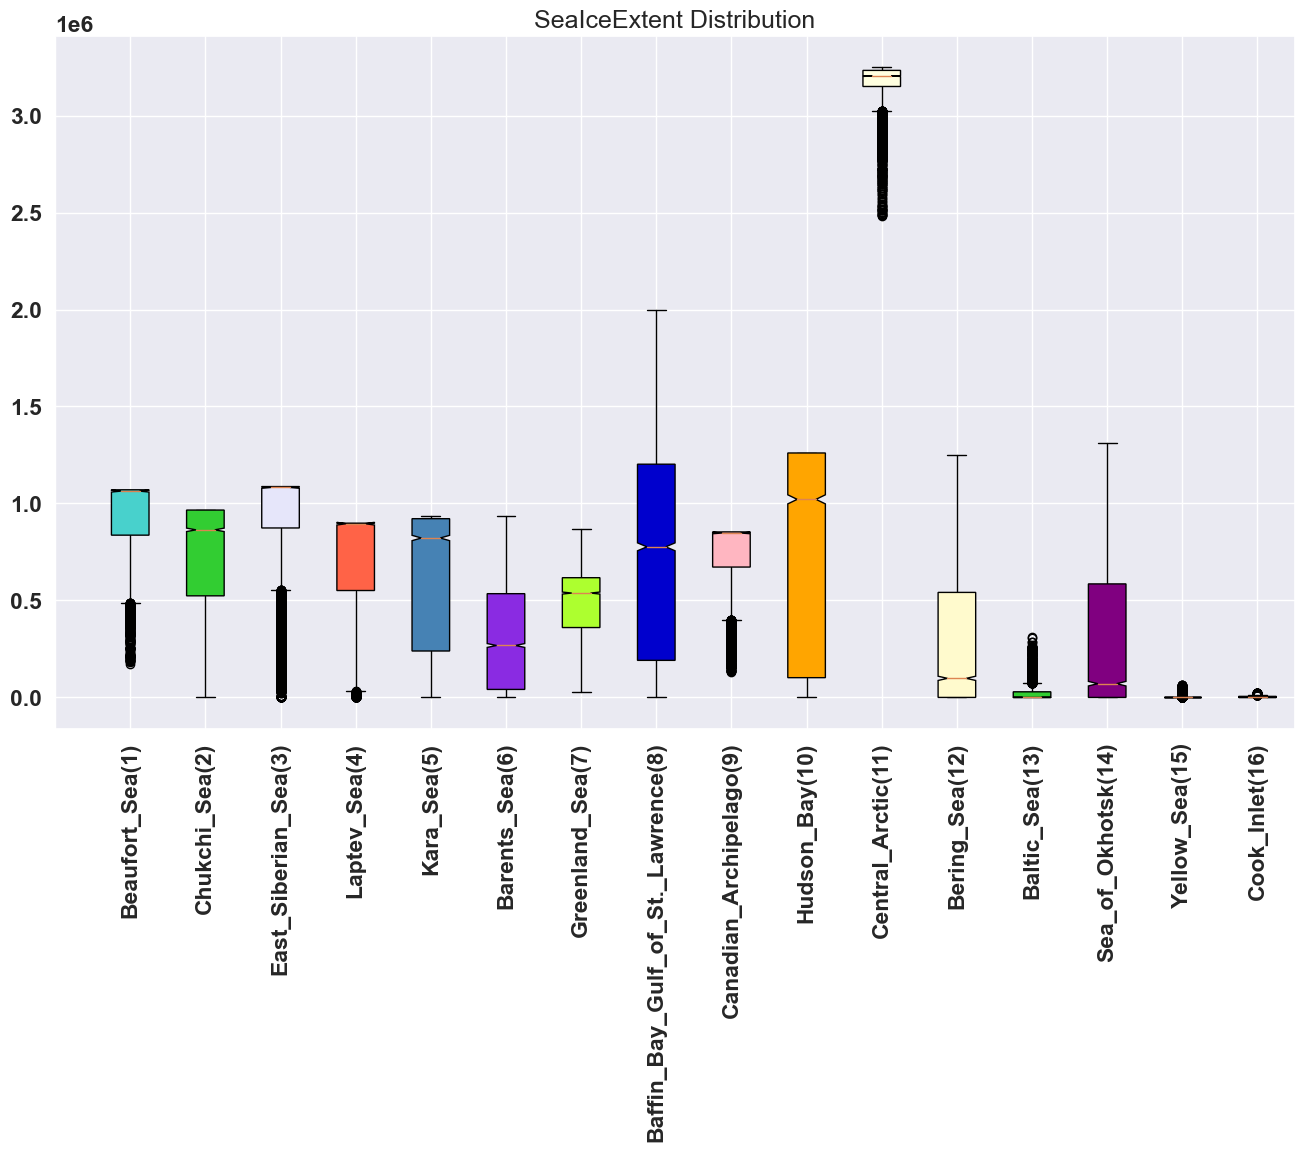

In [50]:
data = df_masie4[['Beaufort_Sea(1)', 'Chukchi_Sea(2)',
       'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)',
       'Barents_Sea(6)', 'Greenland_Sea(7)',
       'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)',
       'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)',
       'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)',
       'Cook_Inlet(16)']]

box = plt.boxplot(data, notch=True, patch_artist=True)
color_list = list(dict_colours.values())
colors = color_list


for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('SeaIceExtent Distribution')
plt.xticks(np.arange(17), [' ', 'Beaufort_Sea(1)', 'Chukchi_Sea(2)',
       'East_Siberian_Sea(3)', 'Laptev_Sea(4)', 'Kara_Sea(5)',
       'Barents_Sea(6)', 'Greenland_Sea(7)',
       'Baffin_Bay_Gulf_of_St._Lawrence(8)', 'Canadian_Archipelago(9)',
       'Hudson_Bay(10)', 'Central_Arctic(11)', 'Bering_Sea(12)',
       'Baltic_Sea(13)', 'Sea_of_Okhotsk(14)', 'Yellow_Sea(15)',
       'Cook_Inlet(16)'], rotation='vertical')

plt.show()

#### central arctic and sea of okhotsk

In [51]:
#create a dataframe for the modeling part
df_ca = df_masie4[['date', 'Central_Arctic(11)','Sea_of_Okhotsk(14)']]
df_ca.rename(columns={ df_ca.columns[1]: "CA_extent"}, inplace=True)
df_ca.rename(columns={ df_ca.columns[2]: "SO_extent"}, inplace=True)
df_ca.head()

date   CA_extent  SO_extent
0 2006-01-01  3225371.74  287369.54
1 2006-01-02  3225371.74  287369.54
2 2006-01-03  3240507.71  311943.21
3 2006-01-04  3240326.47  372868.02
4 2006-01-05  3240326.47  363515.34

In [52]:
# Extract additional features from timestamp column
df_ca = df_ca.assign(
    year = lambda x: x['date'].dt.year,
    month = lambda x: x['date'].dt.month,
    day = lambda x: x['date'].dt.day,
    dayofyear = lambda x: x['date'].dt.dayofyear
)
df_ca.head()

date   CA_extent  SO_extent  year  month  day  dayofyear
0 2006-01-01  3225371.74  287369.54  2006      1    1          1
1 2006-01-02  3225371.74  287369.54  2006      1    2          2
2 2006-01-03  3240507.71  311943.21  2006      1    3          3
3 2006-01-04  3240326.47  372868.02  2006      1    4          4
4 2006-01-05  3240326.47  363515.34  2006      1    5          5

In [53]:
df_ca.to_csv('../data/CA.csv', encoding='utf-8', index=False)

### Focusing on one region (Hudson Bay)

In [54]:
df_hb = df_masie4[['date', 'Hudson_Bay(10)','Northern_Hemisphere']]
df_hb.rename(columns={ df_hb.columns[1]: "HB_extent"}, inplace=True)
df_hb.rename(columns={ df_hb.columns[2]: "total_extent_north"}, inplace=True)
df_hb.head()

date   HB_extent  total_extent_north
0 2006-01-01  1260715.19         13034723.95
1 2006-01-02  1260715.19         13034723.95
2 2006-01-03  1260779.00         13170663.24
3 2006-01-04  1260779.00         13409715.53
4 2006-01-05  1260779.00         13416779.12

In [55]:
df_hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                6043 non-null   datetime64[ns]
 1   HB_extent           6043 non-null   float64       
 2   total_extent_north  6043 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 141.8 KB


In [56]:
# Extract additional features from timestamp column
df_hb = df_hb.assign(
    year = lambda x: x['date'].dt.year,
    month = lambda x: x['date'].dt.month,
    day = lambda x: x['date'].dt.day,
    dayofyear = lambda x: x['date'].dt.dayofyear
)
df_hb.head()

date   HB_extent  total_extent_north  year  month  day  dayofyear
0 2006-01-01  1260715.19         13034723.95  2006      1    1          1
1 2006-01-02  1260715.19         13034723.95  2006      1    2          2
2 2006-01-03  1260779.00         13170663.24  2006      1    3          3
3 2006-01-04  1260779.00         13409715.53  2006      1    4          4
4 2006-01-05  1260779.00         13416779.12  2006      1    5          5

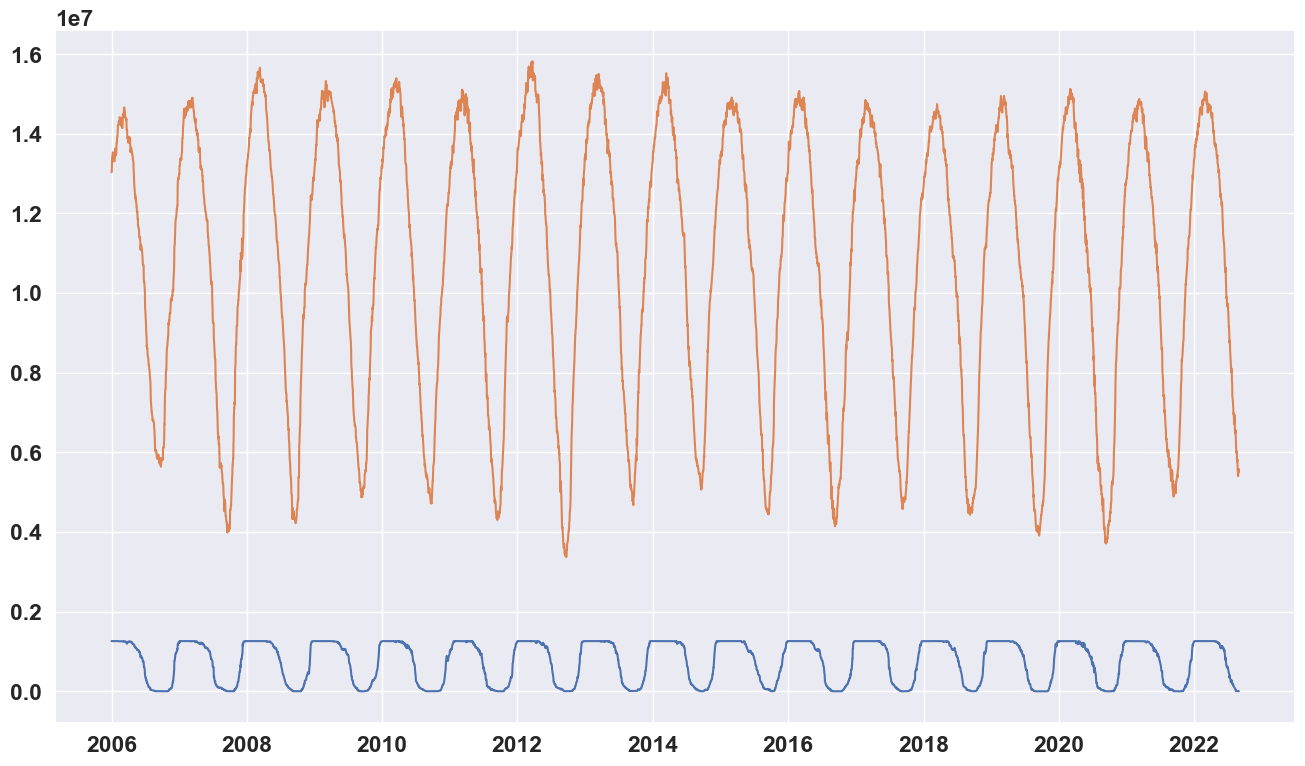

In [57]:
plt.plot(df_hb['date'], df_hb['HB_extent'])
plt.plot(df_hb['date'], df_hb['total_extent_north']);

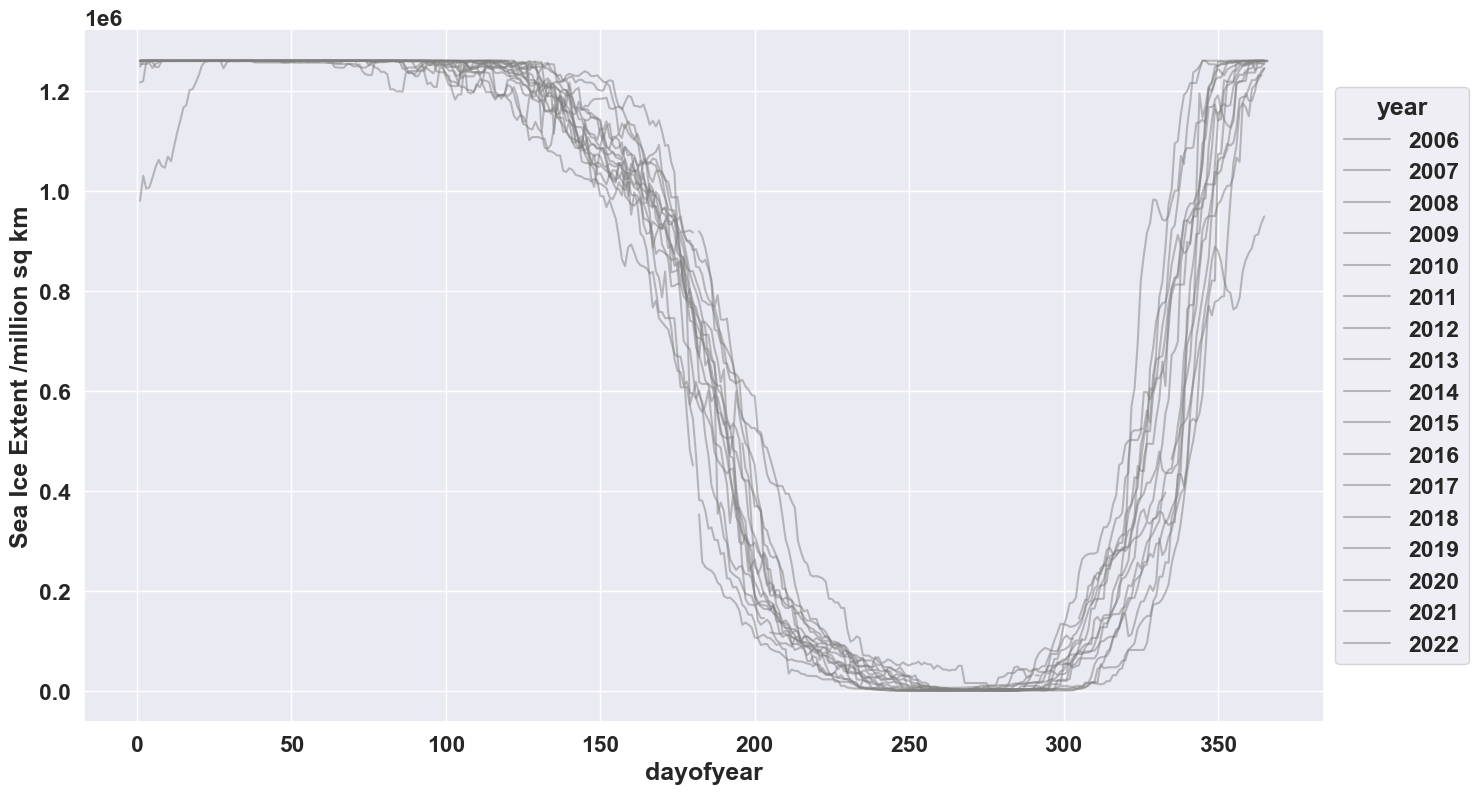

In [58]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df_hb[['year', 'dayofyear', 'HB_extent']], index='dayofyear', columns='year') \
    ['HB_extent'] \
    .plot(color='grey', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(ylabel=r'Sea Ice Extent /million sq km');

In [59]:
col_lst = []
for i in range(17):
    col_lst.append('grey')

In [60]:
df_hb['HB_extent'] /= 1000000

In [61]:
df_hb.query('year == 2015')['HB_extent']

3248    1.260903
3249    1.260903
3250    1.260903
3251    1.260903
3252    1.260903
          ...   
3607    1.237238
3608    1.237238
3609    1.260708
3610    1.260723
3611    1.260723
Name: HB_extent, Length: 364, dtype: float64

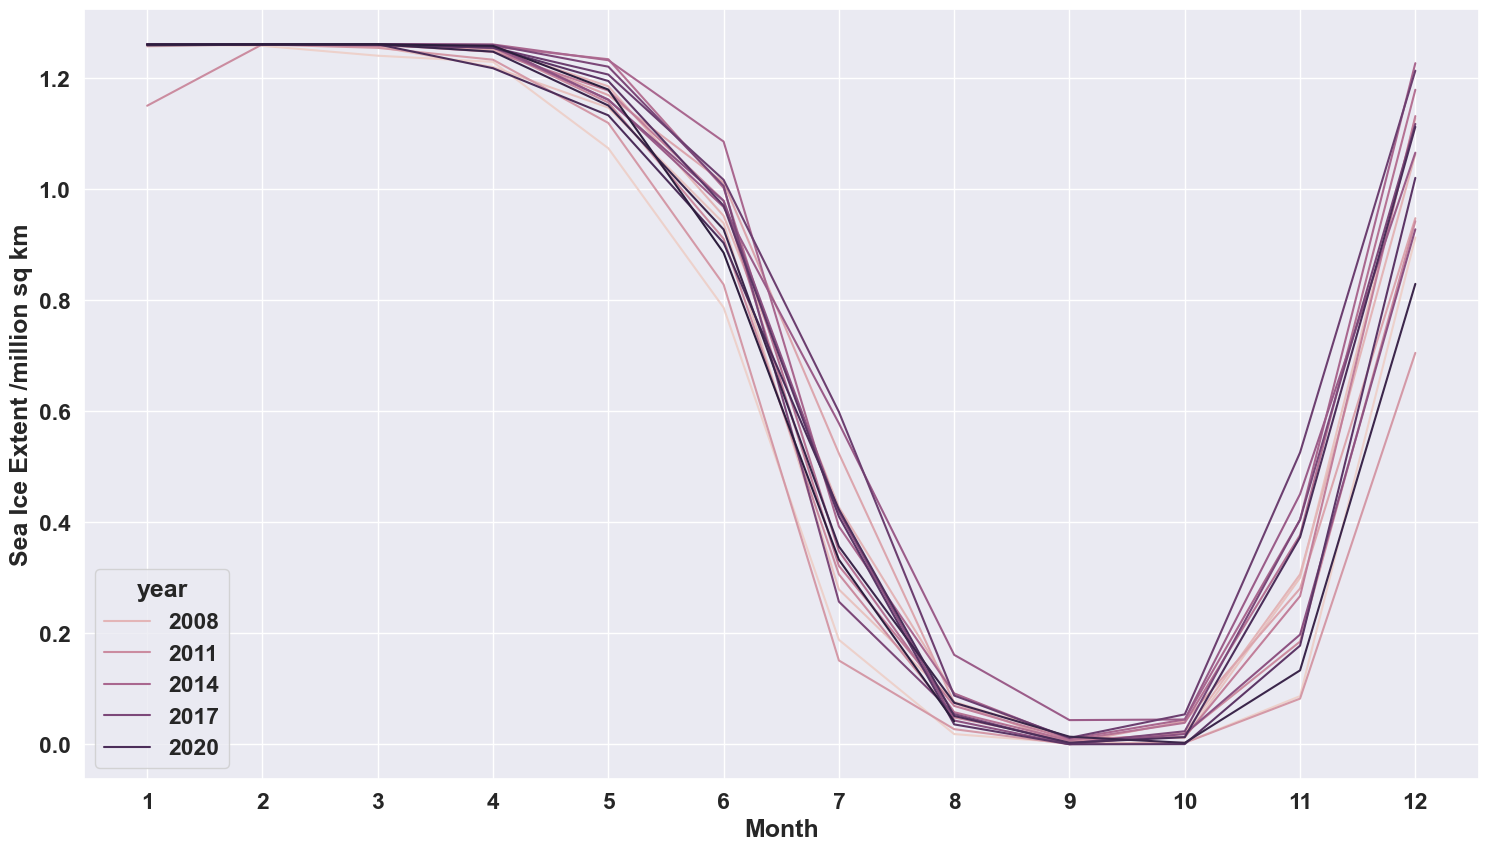

In [62]:
sns.set(font_scale=1.5, style="darkgrid")
fig, axs = plt.subplots(figsize=(18, 10))
sns.lineplot(x='month', y='HB_extent', data=df_hb.reset_index(),  hue='year', ci=None, ax=axs, legend=True)
#sns.lineplot(x=df_hb.query('year == 2018')['month'], y=df_hb.query('year == 2018')['HB_extent'],ci=None, color='blue', linewidth=3)
#sns.lineplot(x=df_hb.query('year == 2015')['month'], y=df_hb.query('year == 2015')['HB_extent'],ci=None, color='blue')
#sns.lineplot(x=df_hb.query('year == 2010')['month'], y=df_hb.query('year == 2010')['HB_extent'], ci=None, color='red', linewidth=3)
#plt.legend(loc='lower left', labels=['2010', '2018'], )
axs.set(ylabel=r'Sea Ice Extent /million sq km')
axs.set(xlabel=r'Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.savefig('../images/HB_final.png');

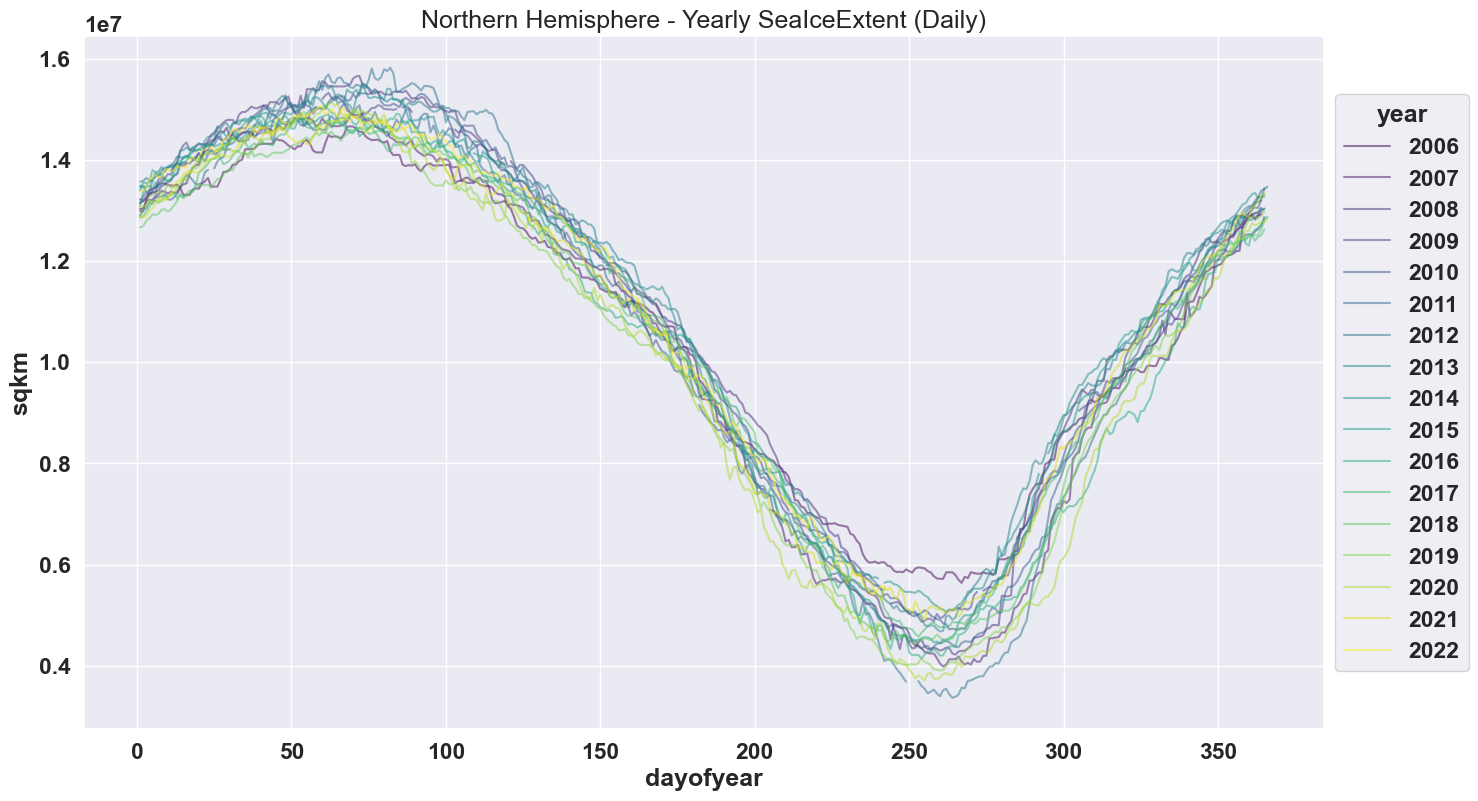

In [63]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df_hb[['year', 'dayofyear', 'total_extent_north']], index='dayofyear', columns='year') \
    ['total_extent_north'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Northern Hemisphere - Yearly SeaIceExtent (Daily)', ylabel=r'sqkm');

In [64]:
# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name
import seaborn as sns

#### playing around with different plots

In [65]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

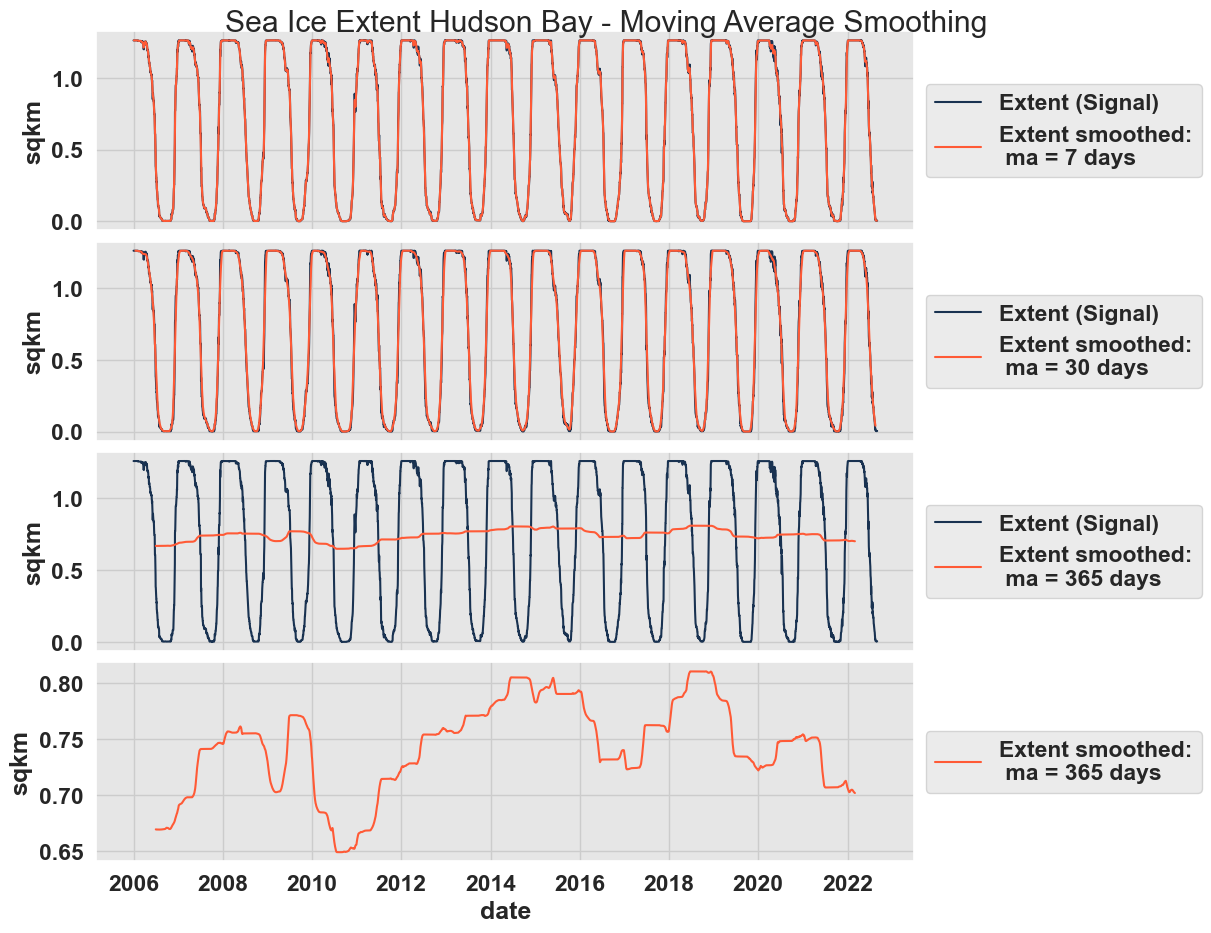

In [66]:
# Plot moving average of different length (week, month, year)
ma = [7, 30, 365]

smooth_daily_df_hb = df_hb
#    .reset_index() \
#    .assign(date = lambda x: x['date'].transform(pd.to_datetime))

# Smooth and plot
fig, ax = plt.subplots(4, 1, figsize=(12, 9), constrained_layout=True,sharex=True)

for i, m in enumerate(ma):

    smooth_daily_df_hb[f'extent_smooth_ma_{m}'] = smooth_daily_df_hb['HB_extent'].rolling(window=m,center=True).mean()

    sns.lineplot(x='date', y='HB_extent', label='Extent (Signal)', data=smooth_daily_df_hb,  ax=ax[i])
    sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=NF_ORANGE, ax=ax[i])


    ax[i].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set(title='', ylabel=r'sqkm');
    
sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=sns_c[1], ax=ax[i+1])
ax[i+1].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax[i+1].set(title='', ylabel=r'sqkm');
    
    
plt.suptitle('Sea Ice Extent Hudson Bay - Moving Average Smoothing', y=1.02);

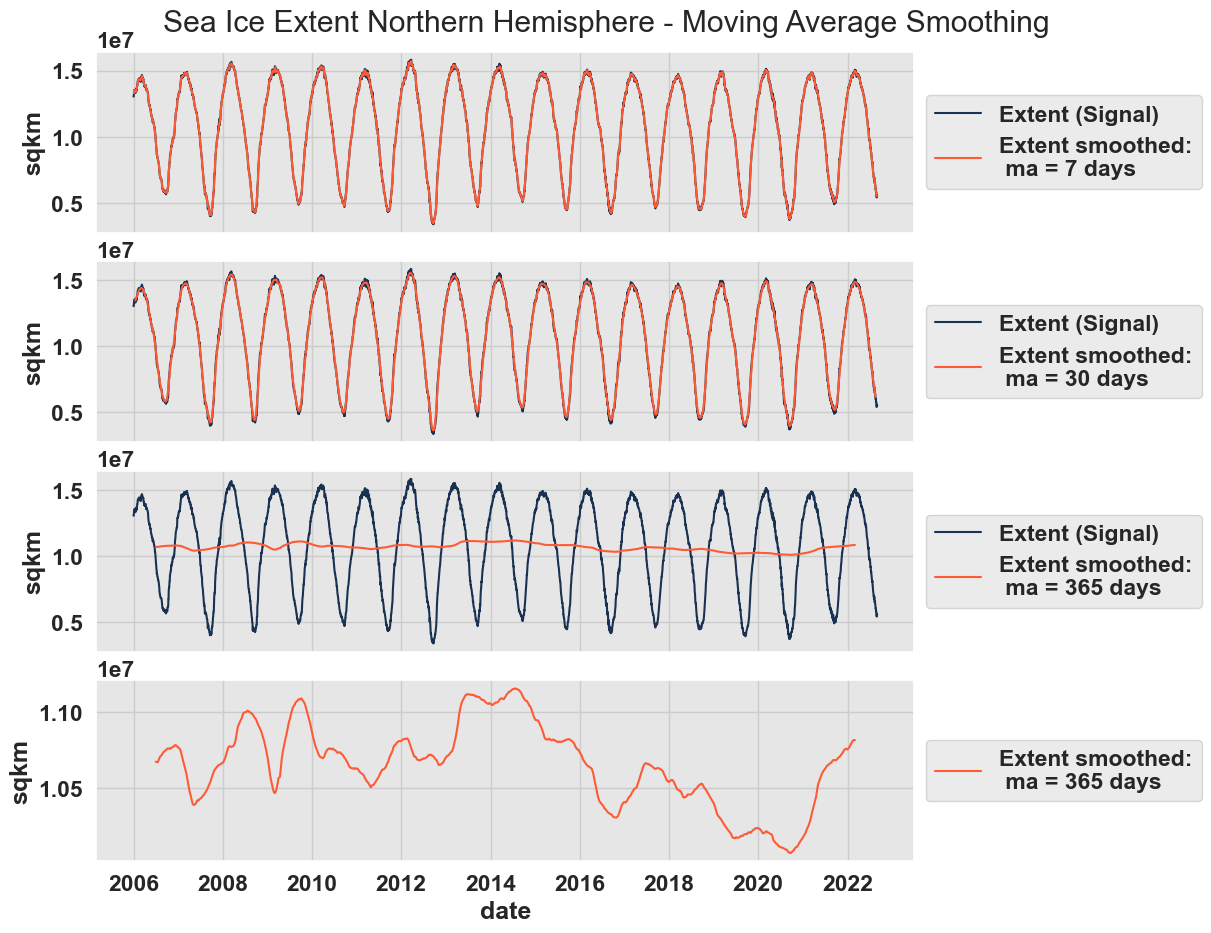

In [67]:
# Plot moving average of different length (week, month, year)
ma = [7, 30, 365]

smooth_daily_df_hb = df_hb
#    .reset_index() \
#    .assign(date = lambda x: x['date'].transform(pd.to_datetime))

# Smooth and plot
fig, ax = plt.subplots(4, 1, figsize=(12, 9), constrained_layout=True,sharex=True)

for i, m in enumerate(ma):

    smooth_daily_df_hb[f'extent_smooth_ma_{m}'] = smooth_daily_df_hb['total_extent_north'].rolling(window=m,center=True).mean()

    sns.lineplot(x='date', y='total_extent_north', label='Extent (Signal)', data=smooth_daily_df_hb,  ax=ax[i])
    sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=NF_ORANGE, ax=ax[i])


    ax[i].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set(title='', ylabel=r'sqkm');
    
sns.lineplot(x='date', y=f'extent_smooth_ma_{m}', label=f'Extent smoothed:\n ma = {m} days', data=smooth_daily_df_hb, color=sns_c[1], ax=ax[i+1])
ax[i+1].legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax[i+1].set(title='', ylabel=r'sqkm');
    
    
plt.suptitle('Sea Ice Extent Northern Hemisphere - Moving Average Smoothing', y=1.02);

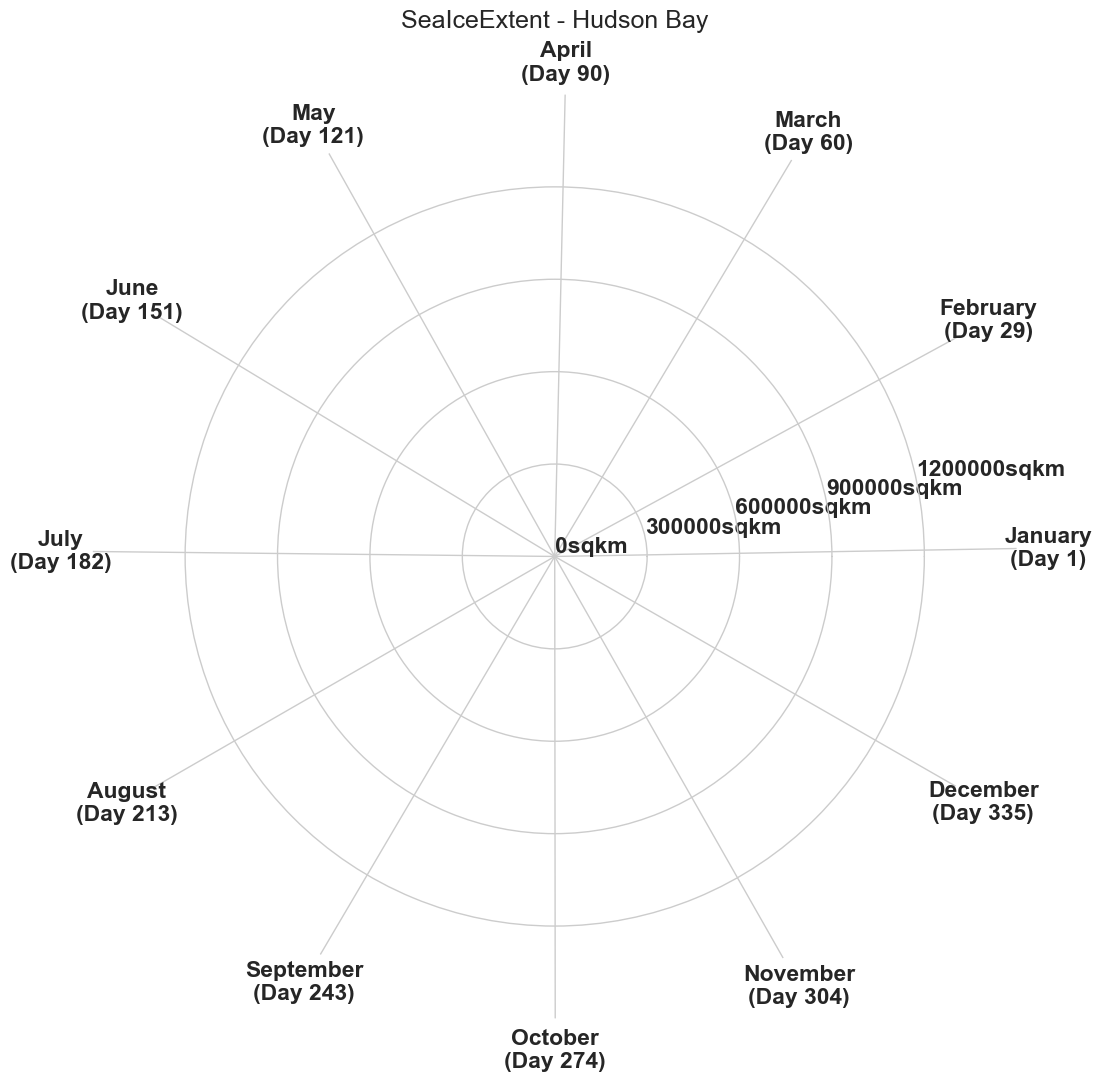

In [68]:
# Polar plot for seasonality 

ax = plt.subplot(111, projection='polar')

# Convert and plot data
df_hb \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='HB_extent', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

days_per_month=[monthrange(2021, i)[1] for i in range(1,13)]                    #findout how many days each month has  
month_theta=(np.array(days_per_month).cumsum()-days_per_month[0]+1)*2*np.pi/365.25 #find the starting day for each month and turn it into an angle 
month_label=[month_name[i] for i in range(1,13)]
month_label=[label+'\n(Day ' +str(int(month_theta[ind]*365.25/np.pi/2)) +')' for ind,label in enumerate(month_label)]

ax.set_facecolor('white')
ax.spines.clear()
ax.set_xticks(month_theta)
ax.set_xticklabels(month_label)
ax.set_ylim(0,1500000)
ax.set_yticks(yt:=[0,300000,600000,900000,1200000])
ax.set_yticklabels([str(t)+'sqkm' for t in yt], rotation = 45)
ax.set_rlabel_position(12) 
ax.xaxis.set_tick_params(which='major',pad=10)

ax.set_rorigin(-5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend().set_visible(False)

ax.set_title('SeaIceExtent - Hudson Bay', va='bottom');
ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

#ax.figure.savefig("Basel_Temp_polar.png")

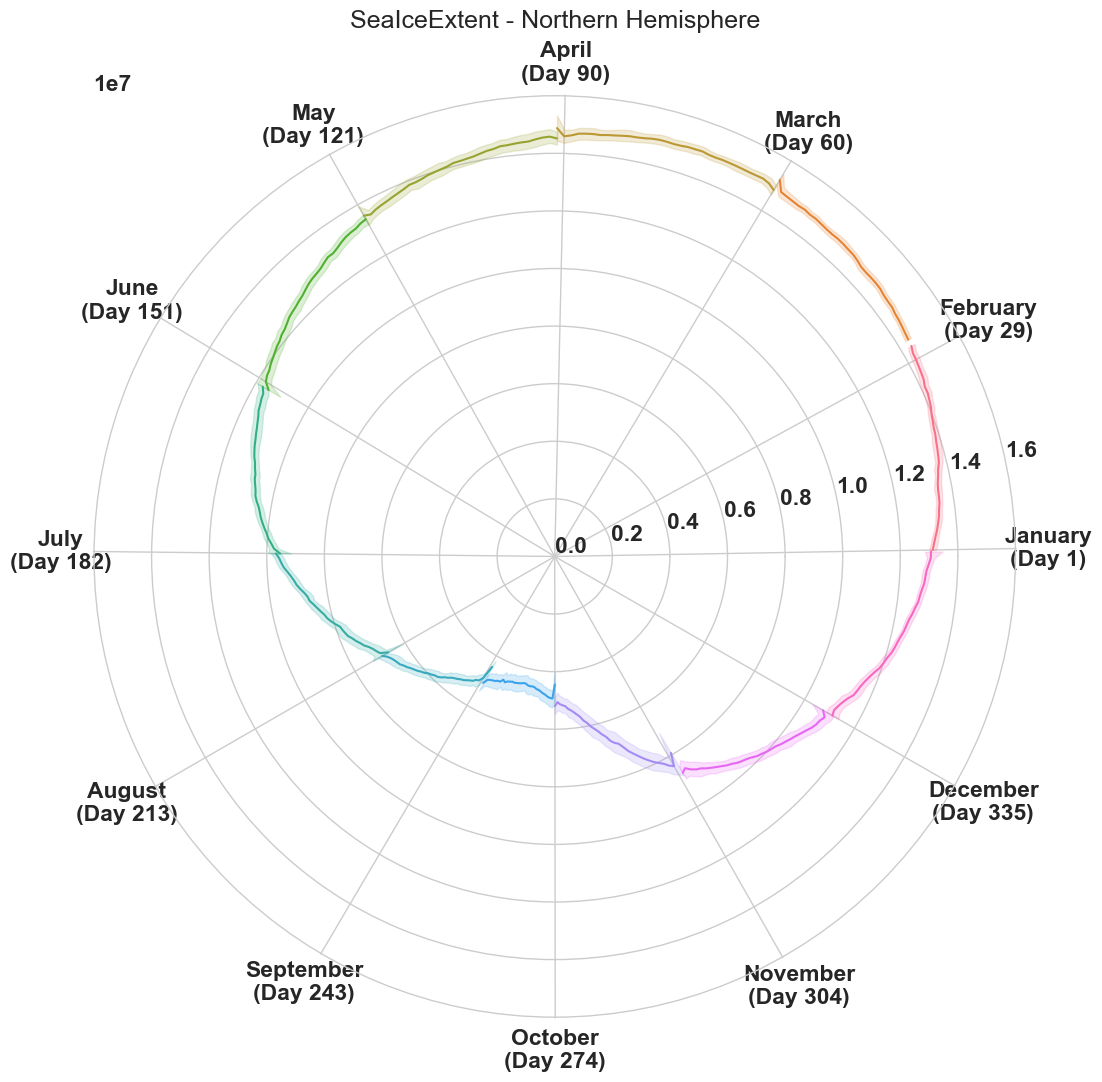

In [69]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df_hb \
    .assign(day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.25)) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='total_extent_north', 
        hue='month',
        palette=sns.color_palette("husl", 12),
        ax=ax
    )

days_per_month=[monthrange(2021, i)[1] for i in range(1,13)]                    #findout how many days each month has  
month_theta=(np.array(days_per_month).cumsum()-days_per_month[0]+1)*2*np.pi/365.25 #find the starting day for each month and turn it into an angle 
month_label=[month_name[i] for i in range(1,13)]
month_label=[label+'\n(Day ' +str(int(month_theta[ind]*365.25/np.pi/2)) +')' for ind,label in enumerate(month_label)]

ax.set_facecolor('white')
ax.spines.clear()
ax.set_xticks(month_theta)
ax.set_xticklabels(month_label)
#ax.set_ylim(0,1500000)
#ax.set_yticks(yt:=[0,300000,600000,900000,1200000])
#ax.set_yticklabels([str(t)+'sqkm' for t in yt], rotation = 45)
ax.set_rlabel_position(12) 
ax.xaxis.set_tick_params(which='major',pad=10)

ax.set_rorigin(-5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend().set_visible(False)

ax.set_title('SeaIceExtent - Northern Hemisphere', va='bottom');
ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

#ax.figure.savefig("Basel_Temp_polar.png")

### seasonal decomposition

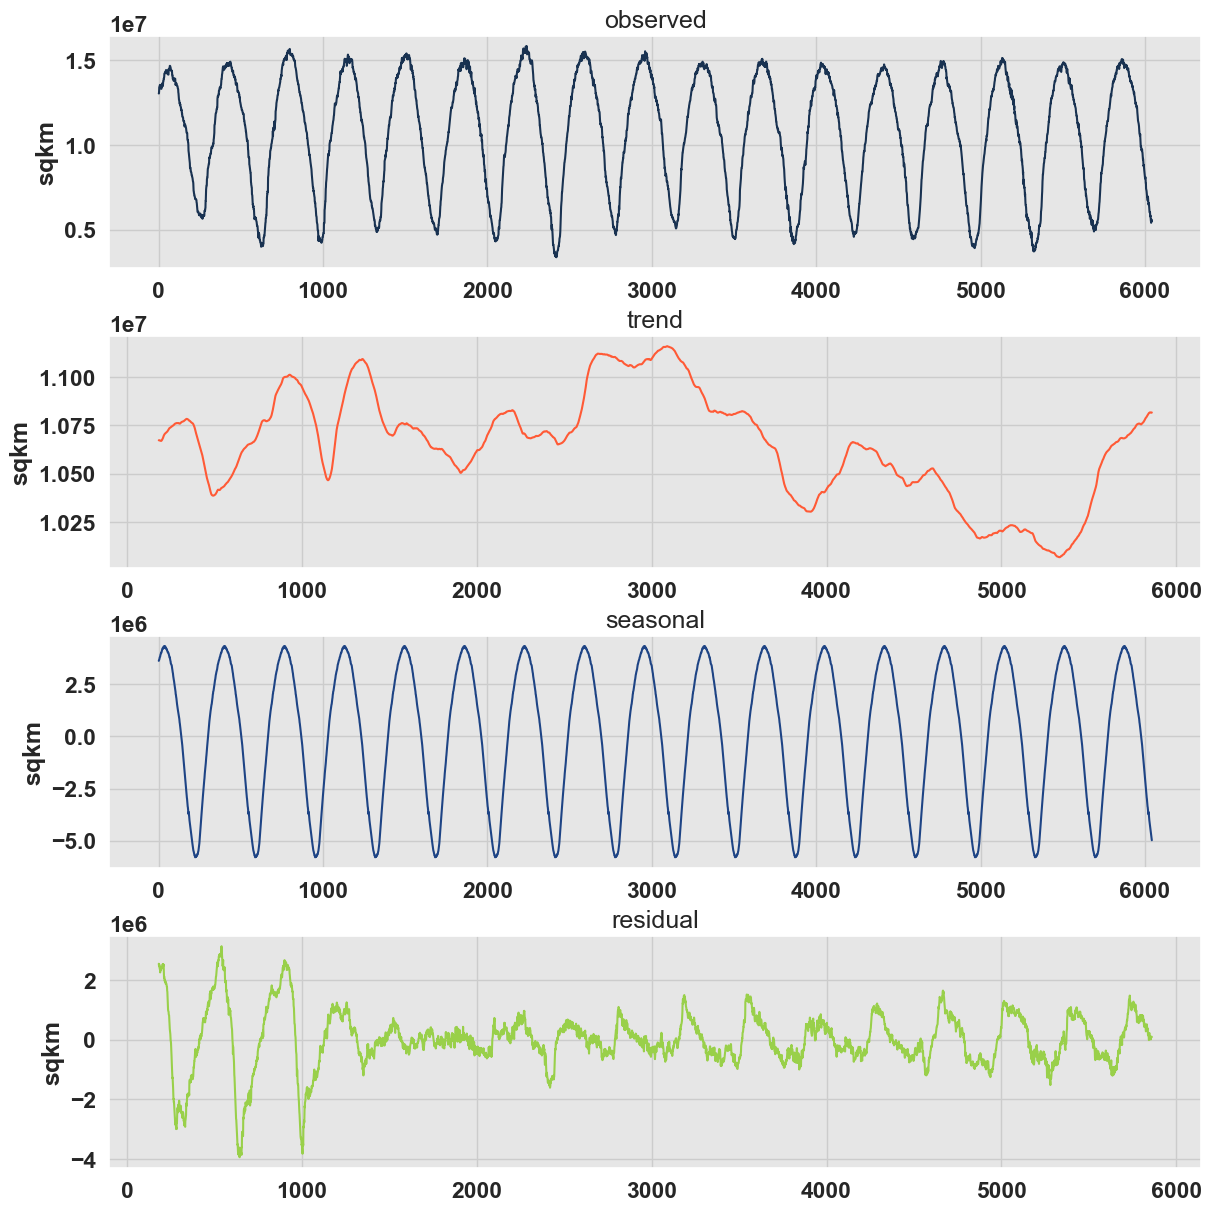

In [70]:
# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    x=df_hb['total_extent_north'], 
    model='additive', 
    period=365
)

# Plot data
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

seas_decomp_yearly.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed', ylabel=r'sqkm')
seas_decomp_yearly.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend', ylabel=r'sqkm')
seas_decomp_yearly.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal', ylabel=r'sqkm')
seas_decomp_yearly.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual', ylabel=r'sqkm');

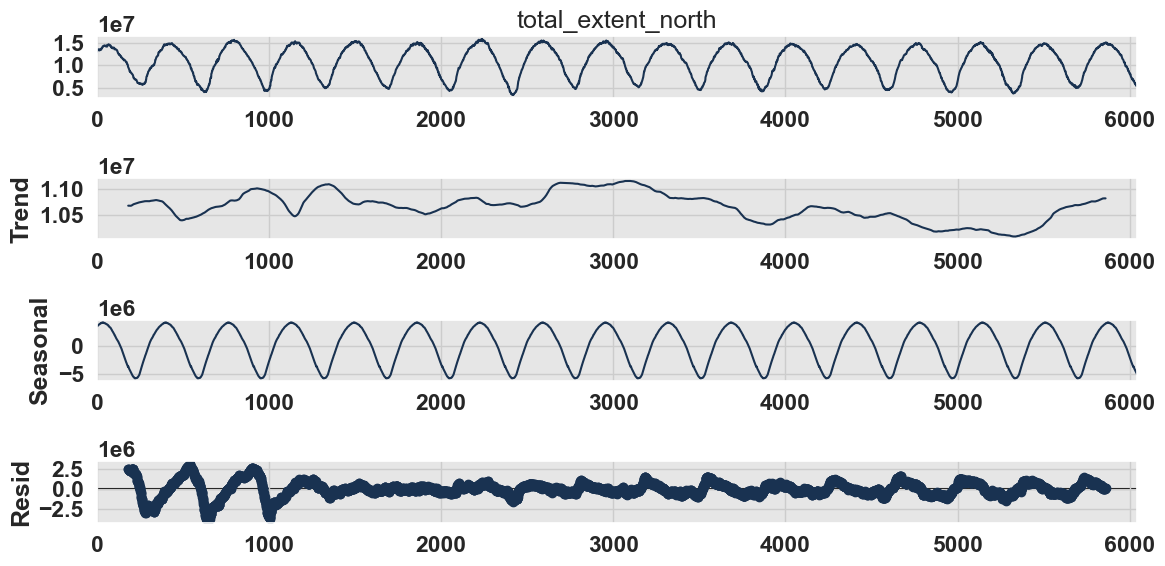

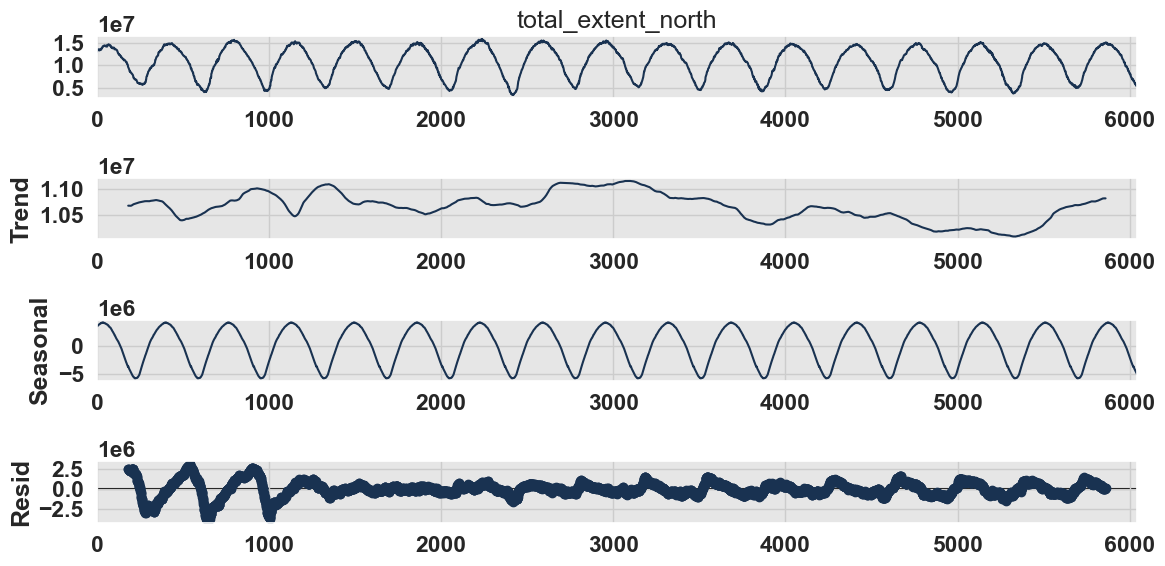

In [71]:
seas_decomp_yearly.plot()

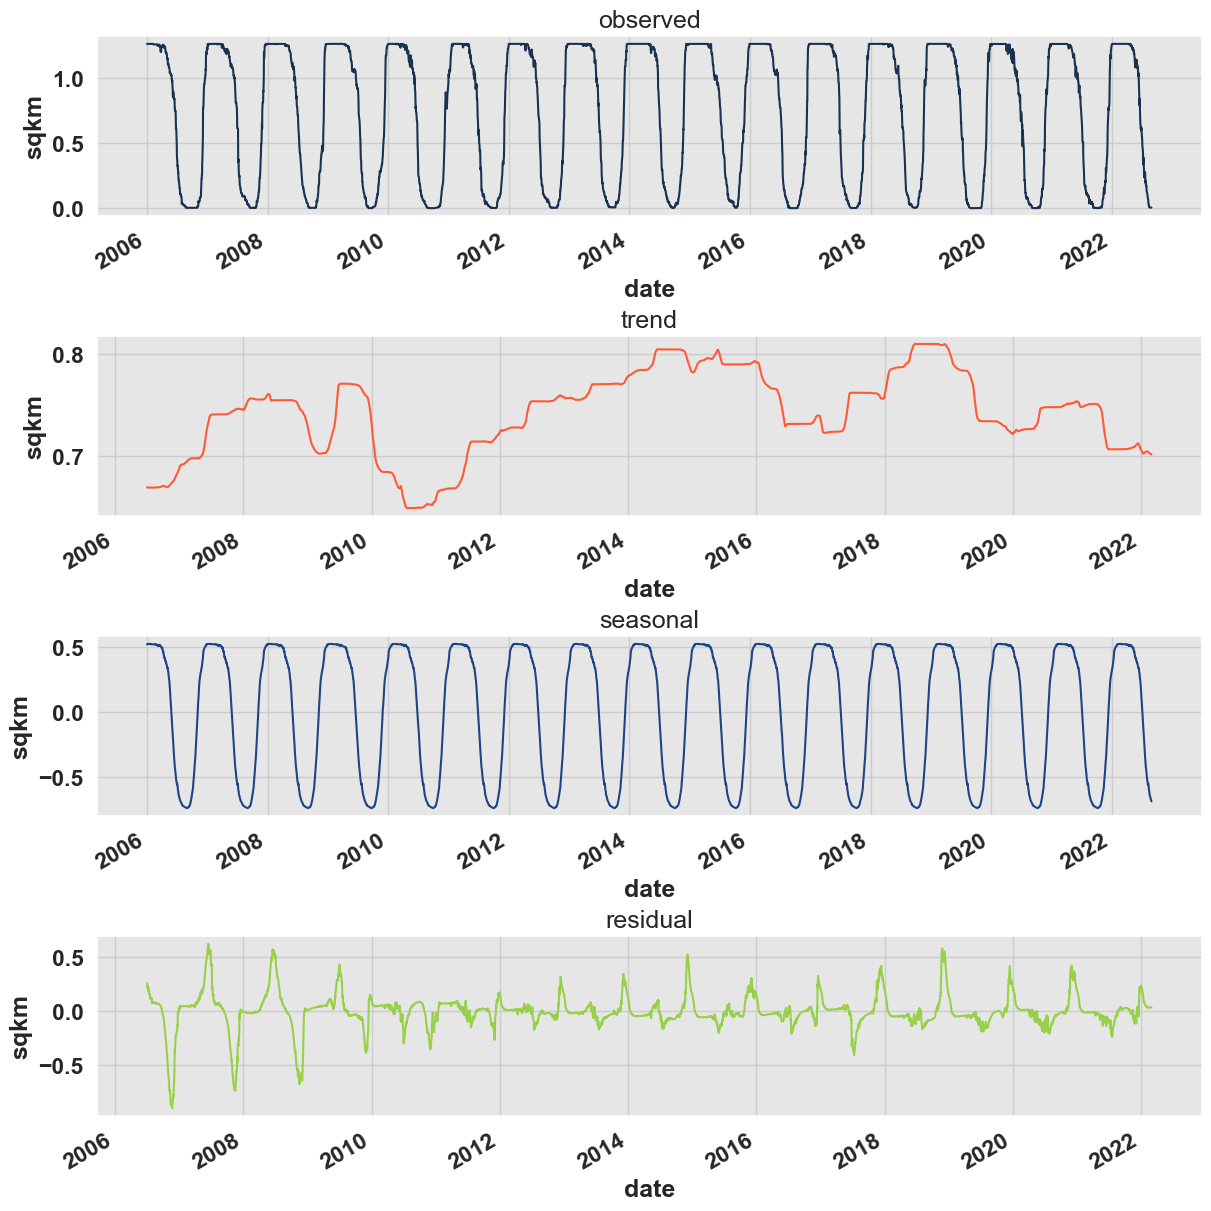

In [72]:
df_hudson = df_hb[['date','HB_extent']]
df_hudson.to_csv('../data/HudsonBay.csv', encoding='utf-8', index=False)

data=pd.read_csv('../data/HudsonBay.csv',header=0,squeeze=True,index_col=[0],parse_dates=[0])

# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    data, 
    model='additive', 
    period=365
)

# Plot data
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

seas_decomp_yearly.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed', ylabel=r'sqkm')
seas_decomp_yearly.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend', ylabel=r'sqkm')
seas_decomp_yearly.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal', ylabel=r'sqkm')
seas_decomp_yearly.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual', ylabel=r'sqkm');